# **Analyzing U.S. Crime Data**





## Youssef Mahmoud -- 201901093

## Mohamed Helmy   -- 201900859

## Hossam Ahsraf   -- 201901898

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests 
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data collection phase:

# **The national crime victimization survey (NCVS) data:**

**Get the datasets from the API by request**

In [ ]:
# the victmization data set --> the people who faced crimes
URL= 'https://data.ojp.usdoj.gov/resource/gcuy-rt5g.csv?$limit=10000000'
r=requests.get(URL)
with open('Victimization.csv',mode='w') as fhand:
    fhand.write(r.text)

In [ ]:
# the population data set --> all the people asked in the interviw
URL= 'https://data.ojp.usdoj.gov/resource/r4j4-fdwx.csv?$limit=10000000'
r=requests.get(URL)
with open('Population.csv',mode='w') as fhand:
    fhand.write(r.text)

In [ ]:
#read datasets --> transform the csv files to pandas data frames

raw_data_victmization = pd.read_csv('/content/Victimization.csv')

raw_data_population = pd.read_csv('/content/Population.csv')


In [ ]:
# make a copy of each dataset to edit on it 
Personal_population = raw_data_population.copy(deep=True) 
Personal_victimization = raw_data_victmization.copy(deep=True) 

In [ ]:
Personal_population.shape
# the population data set is a huge data set which got the limit we specified in the API (10000000) record with 20 features
# when the limit was 1M or 2M large info were dscarded and the data stopped at 2008

(5651131, 20)

In [ ]:
# show the info of the population data sets to know the type of eaech features and indicate the nulls and the names of the features
Personal_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5651131 entries, 0 to 5651130
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   idper           object 
 1   yearq           float64
 2   year            int64  
 3   ager            int64  
 4   sex             int64  
 5   hispanic        int64  
 6   race            int64  
 7   race_ethnicity  int64  
 8   hincome1        int64  
 9   hincome2        int64  
 10  marital         int64  
 11  popsize         int64  
 12  region          int64  
 13  msa             int64  
 14  locality        int64  
 15  educatn1        int64  
 16  educatn2        int64  
 17  veteran         int64  
 18  citizen         int64  
 19  wgtpercy        float64
dtypes: float64(2), int64(17), object(1)
memory usage: 862.3+ MB


In [ ]:
pd.set_option('display.max_columns', None) #just to show all the features when we need to display

In [ ]:
Personal_population.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,6,2,2,1,1,88,-1,4,1,1,3,-1,4,-1,-2,-1,1938.505545
1,204182769936530499999916201,2001.4,2001,5,1,2,1,1,7,-1,1,1,4,1,-1,5,-1,-2,-1,1085.292835
2,204182769936628799999926201,2001.4,2001,3,2,2,1,1,88,-1,2,1,1,2,-1,5,-1,-2,-1,1065.509680
3,204182809902538799999916201,2001.4,2001,4,2,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,0.000000
4,204182809902538799999916202,2001.4,2001,4,1,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,1321.547525


Text(0, 0.5, 'count')

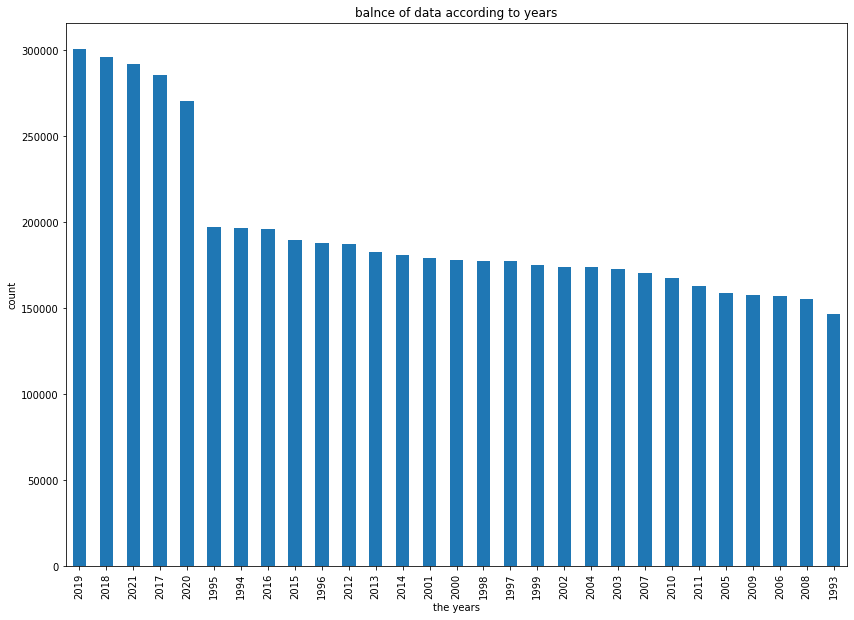

In [ ]:
#check the data balance over the years 
ax = Personal_population['year'].value_counts().plot(kind='bar', figsize=(14,10),title="balnce of data according to years")
ax.set_xlabel("the years")
ax.set_ylabel("count")
# from the year graph it seems that the data is approximately balanced over the years except from 2017 - 2021 the data is larger than the others
# the data was un balanced to thelimit of 1M so, we increased the limit to get the maximum data which are about 5.6M

116


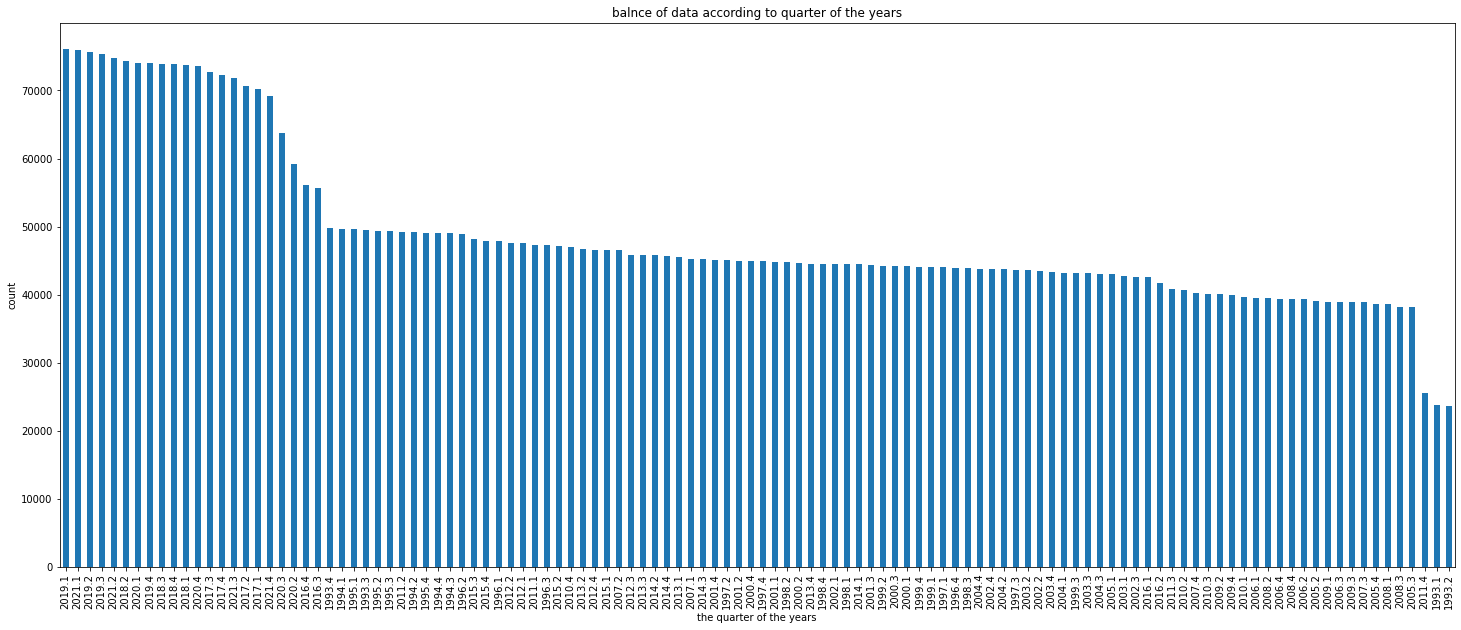

In [ ]:
#check the data balance over the years 
ax = Personal_population['yearq'].value_counts().plot(kind='bar', figsize=(25,10),title="balnce of data according to quarter of the years")
ax.set_xlabel("the quarter of the years")
ax.set_ylabel("count")
#it seems the data is balanced also over the quarters as the years

uni = Personal_population['yearq'].unique()
sorterd_uni = uni.astype(float)
sorterd_uni.sort()
print(len(sorterd_uni))

# als, it does not miss any quarter as expected

## Changing numerical data to categorical 

In [ ]:
#the ager --> age ranges
#instead of un-understable numbers --> the actual ranges are specified to be well specified
#[1 2 3 4 5 6] -- > ['12-17','18-24','25-34','35-49','50-64','65 or older']

age = np.unique(Personal_population['ager'])
print(age)
ager_new = ['12-17','18-24','25-34','35-49','50-64','65 or older']
Personal_population['ager'].replace(to_replace=age, value=ager_new, inplace=True)

[1 2 3 4 5 6]


In [ ]:
#specify the gender
#[1 ,2] --> [Male , Female]

sex_old = np.unique(Personal_population['sex'])
print(sex_old)
sex_new = ['Male','Femle']
Personal_population['sex'].replace(to_replace=sex_old, value=sex_new, inplace=True)

[1 2]


In [ ]:
#specify the Respondent Hispanic origin with its categorical values
# [1 2 88] --> [hispanic nonhispanic residue]

Hispanic_origin_old = np.unique(Personal_population['hispanic'])
print(Hispanic_origin_old)
Hispanic_origin_new = ['Hispanic','Non-Hispanic','Residue']
Personal_population['hispanic'].replace(to_replace=Hispanic_origin_old, value=Hispanic_origin_new, inplace=True)

[ 1  2 88]


In [ ]:
# Respondent race --> white ,black american ,etc
# [1 2 3 4 5] -->['White','Black','American Indian/Alaska Native','Asian/Native Hawaiian/Other Pacific Islander','More than one race']

Race_old = np.unique(Personal_population['race'])
print(Race_old)
Race_new = ['White','Black','American Indian/Alaska Native','Asian/Native Hawaiian/Other Pacific Islander','More than one race']
Personal_population['race'].replace(to_replace=Race_old, value=Race_new, inplace=True)

[1 2 3 4 5]


In [ ]:
#Total income of all members of the household for the 12 months preceding the interview. Categories available from 1993-2021 with imputed data, starting 2015 Q1.
#[ 1  2  3  4  5  6  7 88] -- > ['Less than $7,500','$7,500 to $14,999','$15,000 to $24,999','$25,000 to $34,999','$35,000 to $49,999','$50,000 to $74,999','$75,000 or more','Unknown']
hincome1_old = np.unique(Personal_population['hincome1'])
print(hincome1_old)
hincome1_new = ['Less than $7,500','$7,500 to $14,999','$15,000 to $24,999','$25,000 to $34,999','$35,000 to $49,999','$50,000 to $74,999','$75,000 or more','Unknown']
Personal_population['hincome1'].replace(to_replace=hincome1_old, value=hincome1_new, inplace=True)

[ 1  2  3  4  5  6  7 88]


In [ ]:
#Respondentmarital status --> married , devorced , etc.
#[ 1  2  3  4  5 88] --> ['Never married','Married','Widowed','Divorced','Separated','Residue']

marital_old = np.unique(Personal_population['marital'])
print(marital_old)
marital_new = ['Never married','Married','Widowed','Divorced','Separated','Residue']
Personal_population['marital'].replace(to_replace=marital_old, value=marital_new, inplace=True)

[ 1  2  3  4  5 88]


In [ ]:
#Region of respondent residence. The states have been divided into four groups or census regions,starting 1995 Q3.
# [-1  1  2  3  4] --> ['Invalid until 1995 Q3','Northeast','Midwest','South','West']

region_old = np.unique(Personal_population['region'])
print(region_old)
region_new = ['Invalid until 1995 Q3','Northeast','Midwest','South','West']
Personal_population['region'].replace(to_replace=region_old, value=region_new, inplace=True)

[-1  1  2  3  4]


In [ ]:
#The size range for the place in which the housing unit is located, starting 1995 Q3
#[-1  0  1  2  3  4  5] -->['Invalid until 1995 Q3','Not a place','Under 100,000','100,000-249,999','250,000-499,999','500,000-999,999','1 million or more']

popsize_old = np.unique(Personal_population['popsize'])
print(popsize_old)
popsize_new = ['Invalid until 1995 Q3','Not a place','Under 100,000','100,000-249,999','250,000-499,999','500,000-999,999','1 million or more']
Personal_population['popsize'].replace(to_replace=popsize_old, value=popsize_new, inplace=True)

[-1  0  1  2  3  4  5]


In [ ]:
#Classification of respondent residence based on the Office of Management and Budget definition of metropolitan statistical areas (MSAs)
# [1 2 3] --> ['Principal city within MSA','Not part of principal city within MSA','Outside MSA']

msa_old = np.unique(Personal_population['msa'])
print(msa_old)
msa_new = ['Principal city within MSA','Not part of principal city within MSA','Outside MSA']
Personal_population['msa'].replace(to_replace=msa_old, value=msa_new, inplace=True)

[1 2 3]


In [ ]:
# Respondent level of education
# [ 1  2  3  4  5 88] --> ['No schooling','Grade school','Middle school','High school','College','Residue']
educatn1_old = np.unique(Personal_population['educatn1'])
print(educatn1_old)
educatn1_new = ['No schooling','Grade school','Middle school','High school','College','Residue']
Personal_population['educatn1'].replace(to_replace=educatn1_old, value=educatn1_new, inplace=True)

[ 1  2  3  4  5 88]


In [ ]:
# Respondent level of education, starting 2003 Q1
# [-1  1  2  3  4  5  6  7  8 98] -->['Invalid until 2003 Q1','No schooling','Grade school','Middle school','Some high school','High school graduate','Some college and associate degree','Bachelor’s degree','Advanced degree','Residue']

educatn2_old = np.unique(Personal_population['educatn2'])
print(educatn2_old)
educatn2_new= ['Invalid until 2003 Q1','No schooling','Grade school','Middle school','Some high school','High school graduate','Some college and associate degree','Bachelor’s degree','Advanced degree','Residue']
Personal_population['educatn2'].replace(to_replace=educatn2_old, value=educatn2_new, inplace=True)


[-1  1  2  3  4  5  6  7  8 98]


In [ ]:
#Imputed income categories, starting 2017 Q
# [-1  1  2  3  4  5] -->  ['Invalid until 2017 Q1','Less than $25,000','$25,000 to $49,999','$50,000 to $99,999','$100,000 to $199,999','$200,000 or more']

hincome2_old = np.unique(Personal_population['hincome2'])
print(hincome2_old)
hincome2_new = ['Invalid until 2017 Q1','Less than $25,000','$25,000 to $49,999','$50,000 to $99,999','$100,000 to $199,999','$200,000 or more']
Personal_population['hincome2'].replace(to_replace=hincome2_old, value=hincome2_new, inplace=True)

[-1  1  2  3  4  5]


In [ ]:
# Location of household based on BJS geography definitions, starting 2020 Q1
# [-1  1  2  3] -->  ['Invalid until 2020 Q1','Urban','Suburban','Rural']

locality_old = np.unique(Personal_population['locality'])
print(locality_old)
locality_new = ['Invalid until 2020 Q1','Urban','Suburban','Rural']
Personal_population['locality'].replace(to_replace=locality_old, value=locality_new, inplace=True)



[-1  1  2  3]


In [ ]:
# Respondent veteran status, starting in 2017
# [-2 -1  0  1  8  9] -->['Invalid until 2017 Q1','Under age 18','Not a veteran','Veteran','Residue','Out of universe']

veteran_old = np.unique(Personal_population['veteran'])
print(veteran_old)
veteran_new = ['Invalid until 2017 Q1','Under age 18','Not a veteran','Veteran','Residue','Out of universe']
Personal_population['veteran'].replace(to_replace=veteran_old, value=veteran_new, inplace=True)

[-2 -1  0  1  8  9]


In [ ]:
# Respondent citizenship status, starting 2017 Q1
# [-1  1  2  3  8  9] --> ['Invalid until 2017 Q1','Born U.S. citizen','Naturalized citizen','Non-U.S. Citizen','Residue','Out of universe']

citizen_old = np.unique(Personal_population['citizen'])
print(citizen_old)
citizen_new = ['Invalid until 2017 Q1','Born U.S. citizen','Naturalized citizen','Non-U.S. Citizen','Residue','Out of universe']
Personal_population['citizen'].replace(to_replace=citizen_old, value=citizen_new, inplace=True)


[-1  1  2  3  8  9]


In [ ]:
Personal_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5651131 entries, 0 to 5651130
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   idper           object 
 1   yearq           float64
 2   year            int64  
 3   ager            object 
 4   sex             object 
 5   hispanic        object 
 6   race            object 
 7   race_ethnicity  int64  
 8   hincome1        object 
 9   hincome2        object 
 10  marital         object 
 11  popsize         object 
 12  region          object 
 13  msa             object 
 14  locality        object 
 15  educatn1        object 
 16  educatn2        object 
 17  veteran         object 
 18  citizen         object 
 19  wgtpercy        float64
dtypes: float64(2), int64(2), object(16)
memory usage: 862.3+ MB


In [ ]:
Personal_population.head(5)

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,65 or older,Femle,Non-Hispanic,White,1,Unknown,Invalid until 2017 Q1,Divorced,"Under 100,000",Northeast,Outside MSA,Invalid until 2020 Q1,High school,Invalid until 2003 Q1,Invalid until 2017 Q1,Invalid until 2017 Q1,1938.505545
1,204182769936530499999916201,2001.4,2001,50-64,Male,Non-Hispanic,White,1,"$75,000 or more",Invalid until 2017 Q1,Never married,"Under 100,000",West,Principal city within MSA,Invalid until 2020 Q1,College,Invalid until 2003 Q1,Invalid until 2017 Q1,Invalid until 2017 Q1,1085.292835
2,204182769936628799999926201,2001.4,2001,25-34,Femle,Non-Hispanic,White,1,Unknown,Invalid until 2017 Q1,Married,"Under 100,000",Northeast,Not part of principal city within MSA,Invalid until 2020 Q1,College,Invalid until 2003 Q1,Invalid until 2017 Q1,Invalid until 2017 Q1,1065.509680
3,204182809902538799999916201,2001.4,2001,35-49,Femle,Hispanic,White,6,"$50,000 to $74,999",Invalid until 2017 Q1,Married,1 million or more,Northeast,Principal city within MSA,Invalid until 2020 Q1,College,Invalid until 2003 Q1,Invalid until 2017 Q1,Invalid until 2017 Q1,0.000000
4,204182809902538799999916202,2001.4,2001,35-49,Male,Hispanic,White,6,"$50,000 to $74,999",Invalid until 2017 Q1,Married,1 million or more,Northeast,Principal city within MSA,Invalid until 2020 Q1,College,Invalid until 2003 Q1,Invalid until 2017 Q1,Invalid until 2017 Q1,1321.547525


## Drop the unwanted Features in our analysis with explination

In [ ]:
#Drop the year as it is preserved in the column of year and quarter
#Drop educatn1 as educatn2 has wider casses including educatn1 casses in addition educ2 is starting from 2003 which neglect allthe previous years
#Drop Race/ethnicity as it is a mix between Hispanic origin and race columns 
#Drop hincome2 as it is starting from 2017 and neglect all other --> when get it is unique values it doensn't add any info


Personal_population.drop(['year','educatn2','hincome2','race_ethnicity'], axis=1, inplace=True)

## **Changing to representable column names**

In [ ]:
Personal_population.rename(columns = {'msa':'metropolitan_statistical_areas', 'idper':'id' , 'yearq':'year_quarter' , 'ager':'age_range','hincome1':'house_hold_income','educatn1':'education_level'}, inplace = True)
Personal_population.head().T

,0,1,2,3,4
id,204182769930938799999916201,204182769936530499999916201,204182769936628799999926201,204182809902538799999916201,204182809902538799999916202
year_quarter,2001.4,2001.4,2001.4,2001.4,2001.4
age_range,65 or older,50-64,25-34,35-49,35-49
sex,Femle,Male,Femle,Femle,Male
hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Hispanic,Hispanic
race,White,White,White,White,White
house_hold_income,Unknown,"$75,000 or more",Unknown,"$50,000 to $74,999","$50,000 to $74,999"
marital,Divorced,Never married,Married,Married,Married
popsize,"Under 100,000","Under 100,000","Under 100,000",1 million or more,1 million or more
region,Northeast,West,Northeast,Northeast,Northeast


## Victimization data

In [ ]:
Personal_victimization.head(5)

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,newcrime,newoff,seriousviolent,notify,vicservices,locationr,direl,weapon,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,2,2,2,2,2,1,-1,1,1,3,3,-1,4,4,-2,-1,1,4,2,1,2,2,1,2,0,0,1,0,3,1,-1,1952.97373,1,1952.97373
1,254207015147069329204211203,2009.1,2009,1,1,2,1,1,7,-1,1,1,1,2,-1,4,4,-2,-1,1,2,1,1,2,3,4,1,2,0,1,0,5,1,-1,5570.68773,1,5570.68773
2,210313595043196799999912102,2004.1,2004,4,1,2,1,1,5,-1,2,0,1,2,-1,4,5,-2,-1,1,4,2,2,2,3,3,2,0,0,1,0,4,1,-1,3366.95748,1,3366.95748
3,252018211553075329282015501,2011.4,2011,3,1,1,1,6,5,-1,2,3,3,1,-1,4,4,-2,-1,1,4,2,1,2,3,5,2,0,0,1,0,88,1,-1,6991.56061,1,6991.56061
4,210376205057919299999921201,2004.1,2004,2,1,2,1,1,6,-1,1,1,1,2,-1,5,7,-2,-1,1,4,2,2,2,3,4,2,0,1,3,1,3,3,-1,2834.64905,1,2834.64905


## **Numerical to categorical based on the codebook**

In [ ]:
#Personal info about the victim {same as these in the personal population dataset}
Personal_victimization['ager'].replace(to_replace=age, value=ager_new, inplace=True)
Personal_victimization['sex'].replace(to_replace=sex_old, value=sex_new, inplace=True)
Personal_victimization['hispanic'].replace(to_replace=Hispanic_origin_old, value=Hispanic_origin_new, inplace=True)
Personal_victimization['race'].replace(to_replace=Race_old, value=Race_new, inplace=True)
Personal_victimization['hincome1'].replace(to_replace=hincome1_old, value=hincome1_new, inplace=True)
Personal_victimization['hincome2'].replace(to_replace=hincome2_old, value=hincome2_new, inplace=True)
Personal_victimization['marital'].replace(to_replace=marital_old, value=marital_new, inplace=True)
Personal_victimization['region'].replace(to_replace=region_old, value=region_new, inplace=True)
Personal_victimization['popsize'].replace(to_replace=popsize_old, value=popsize_new, inplace=True)
Personal_victimization['msa'].replace(to_replace=msa_old, value=msa_new, inplace=True)
Personal_victimization['locality'].replace(to_replace=locality_old, value=locality_new, inplace=True)
Personal_victimization['educatn1'].replace(to_replace=educatn1_old, value=educatn1_new, inplace=True)
Personal_victimization['veteran'].replace(to_replace=veteran_old, value=veteran_new, inplace=True)
Personal_victimization['citizen'].replace(to_replace=citizen_old, value=citizen_new, inplace=True)

In [ ]:
newoff_old = np.unique(Personal_victimization['newoff'])
print(newoff_old)
newoff_new = ['Rape/sexual assault','Robbery','Aggravated assault','Simple assault','Personal theft/larceny']
Personal_victimization['newoff'].replace(to_replace=newoff_old, value=newoff_new, inplace=True)

[1 2 3 4 5]


In [ ]:
notify_old = np.unique(Personal_victimization['notify'])
print(notify_old)
notify_new = ['Yes','No','Do not know','Residue']
Personal_victimization['notify'].replace(to_replace=notify_old, value=notify_new, inplace=True)

[1 2 3 8]


In [ ]:
vicservices_old = np.unique(Personal_victimization['vicservices']) 
print(vicservices_old)
vicservices_new = ['Yes','No','Do not know','Residue']
Personal_victimization['vicservices'].replace(to_replace=vicservices_old, value=vicservices_new, inplace=True)

[1 2 3 8]


In [ ]:
locationr_old = np.unique(Personal_victimization['locationr']) 
print(locationr_old)
locationr_new = ['At or near victim’s home','At or near friend’s,neighbor’s, or relative’s home','Commercial place,parking lot, other public area','School','Other location']
Personal_victimization['locationr'].replace(to_replace=locationr_old, value=locationr_new, inplace=True)

[1 2 3 4 5]


In [ ]:
direl_old = np.unique(Personal_victimization['direl']) 
print(direl_old)
direl_new = ['Intimates','Other relatives','Well known/casual acquaintance','Strangers','Do not know relationship','Do not know number of offenders']
Personal_victimization['direl'].replace(to_replace=direl_old, value=direl_new, inplace=True)

[1 2 3 4 5 6]


In [ ]:
weapcat_old = np.unique(Personal_victimization['weapcat']) 
print(weapcat_old)
weapcat_new = ['No weapon','Firearm','Knife','Other type weapon','Type weapon unknown','Do not know if offender had weapon']
Personal_victimization['weapcat'].replace(to_replace=weapcat_old, value=weapcat_new, inplace=True)

[0 1 2 3 4 5]


In [ ]:
serious_old = np.unique(Personal_victimization['serious']) 
print(serious_old)
serious_new = ['No injury','Serious injury','Minor injury','Rape w/o other injuries','Residue']
Personal_victimization['serious'].replace(to_replace=serious_old, value=serious_new, inplace=True)

[ 1  2  3  4 88]


In [ ]:
treatment_old = np.unique(Personal_victimization['treatment']) 
print(treatment_old)
treatment_new = ['Not injured','Not treated','Treated at scene,home, medical office,or other location','Don’t know','Residue']
Personal_victimization['treatment'].replace(to_replace=treatment_old, value=treatment_new, inplace=True)

[ 0  1  2  3 88]


In [ ]:
offenderage_old = np.unique(Personal_victimization['offenderage']) 
print(offenderage_old)
offenderage_new = ['11 or younger','12-17','18-29','30 or older','Multiple offenders of various ages','Residue']
Personal_victimization['offenderage'].replace(to_replace=offenderage_old, value=offenderage_new, inplace=True)

[ 1  2  3  4  5 88]


In [ ]:
offendersex_old = np.unique(Personal_victimization['offendersex']) 
print(offendersex_old)
offendersex_new = ['Male','Female','Both male and female offenders','Unknown','Residue']
Personal_victimization['offendersex'].replace(to_replace=offendersex_old, value=offendersex_new, inplace=True)

[ 1  2  3  4 88]


In [ ]:
offtracenew_old = np.unique(Personal_victimization['offtracenew']) 
print(offtracenew_old)
offtracenew_new = ['Invalid until 2012 Q1','Non-Hispanic white','Non-Hispanic black','Non-Hispanic','American Indian/Alaska Native','Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander', 'Non-Hispanic more than one race','Hispanic','Unknown race/ethnicity''Mixed race group of offenders','Unknown number of offenders']
Personal_victimization['offtracenew'].replace(to_replace=offtracenew_old, value=offtracenew_new, inplace=True)

[-1  1  2  3  4  5  6  7 10 11]


In [ ]:
series_old = np.unique(Personal_victimization['series']) 
print(series_old)
series_new = ['Not a series crime','Series crime']
Personal_victimization['series'].replace(to_replace=series_old, value=series_new, inplace=True)

[1 2]


In [ ]:
Personal_victimization.head(5)

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,newcrime,newoff,seriousviolent,notify,vicservices,locationr,direl,weapon,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,18-24,Femle,Non-Hispanic,Black,2,"Less than $7,500",Invalid until 2017 Q1,Never married,"Under 100,000",South,Outside MSA,Invalid until 2020 Q1,High school,4,Invalid until 2017 Q1,Invalid until 2017 Q1,1,Simple assault,2,Yes,No,"At or near friend’s,neighbor’s, or relative’s ...",Intimates,2,No weapon,0,No injury,Not injured,18-29,Male,Invalid until 2012 Q1,1952.97373,Not a series crime,1952.97373
1,254207015147069329204211203,2009.1,2009,12-17,Male,Non-Hispanic,White,1,"$75,000 or more",Invalid until 2017 Q1,Never married,"Under 100,000",Northeast,Not part of principal city within MSA,Invalid until 2020 Q1,High school,4,Invalid until 2017 Q1,Invalid until 2017 Q1,1,Robbery,1,Yes,No,"Commercial place,parking lot, other public area",Strangers,1,Knife,0,No injury,Not injured,Multiple offenders of various ages,Male,Invalid until 2012 Q1,5570.68773,Not a series crime,5570.68773
2,210313595043196799999912102,2004.1,2004,35-49,Male,Non-Hispanic,White,1,"$35,000 to $49,999",Invalid until 2017 Q1,Married,Not a place,Northeast,Not part of principal city within MSA,Invalid until 2020 Q1,High school,5,Invalid until 2017 Q1,Invalid until 2017 Q1,1,Simple assault,2,No,No,"Commercial place,parking lot, other public area",Well known/casual acquaintance,2,No weapon,0,No injury,Not injured,30 or older,Male,Invalid until 2012 Q1,3366.95748,Not a series crime,3366.95748
3,252018211553075329282015501,2011.4,2011,25-34,Male,Hispanic,White,6,"$35,000 to $49,999",Invalid until 2017 Q1,Married,"250,000-499,999",South,Principal city within MSA,Invalid until 2020 Q1,High school,4,Invalid until 2017 Q1,Invalid until 2017 Q1,1,Simple assault,2,Yes,No,"Commercial place,parking lot, other public area",Do not know relationship,2,No weapon,0,No injury,Not injured,Residue,Male,Invalid until 2012 Q1,6991.56061,Not a series crime,6991.56061
4,210376205057919299999921201,2004.1,2004,18-24,Male,Non-Hispanic,White,1,"$50,000 to $74,999",Invalid until 2017 Q1,Never married,"Under 100,000",Northeast,Not part of principal city within MSA,Invalid until 2020 Q1,College,7,Invalid until 2017 Q1,Invalid until 2017 Q1,1,Simple assault,2,No,No,"Commercial place,parking lot, other public area",Strangers,2,No weapon,1,Minor injury,Not treated,18-29,Both male and female offenders,Invalid until 2012 Q1,2834.64905,Not a series crime,2834.64905


## Drop the unwanted Features in our analysis with explination

In [ ]:
#Drop the year as it is preserved in the column of year and quarter
#Drop educatn2 as educatn1 is valid in all the years 
#Drop Race/ethnicity as it is a mix between Hispanic origin and race columns
#Drop hincome2 as hincome1 is more represtive to the data and have more valid rows
#---------------------------------------------------------------------------------------------
#Drop newcrime, seriousviolent as they can be concluded from the crime type 'newoff' column
#Drop presence of weapon 'weapon' column as it can be concluded from the Weapon category 'webcat' column
#Drop presence of Injury 'injury' column as it can be concluded from the Type of injury 'serious' column
Personal_victimization.drop(['year','educatn2','hincome2','race_ethnicity','newcrime', 'seriousviolent','weapon','injury'], axis=1, inplace=True)

## **Changing to representable column names**

In [ ]:
Personal_victimization.rename(columns = {'msa':'metropolitan_statistical_areas', 'idper':'id' , 'yearq':'year_quarter' , 'ager':'age_range','hincome1':'house_hold_income','educatn1':'education_level',
                                         'direl':'victim_offender_relation','newoff':'offense_type','locationr':'crime_location','weapcat':'weapon_category','serious':'injury_type',
                                         'wgtviccy':'victmization_weight','newwgt':'series_adjusted_victmization_weigt'}, inplace = True)
Personal_victimization.head().T

,0,1,2,3,4
id,210176836193319999999923301,254207015147069329204211203,210313595043196799999912102,252018211553075329282015501,210376205057919299999921201
year_quarter,2004.1,2009.1,2004.1,2011.4,2004.1
age_range,18-24,12-17,35-49,25-34,18-24
sex,Femle,Male,Male,Male,Male
hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Hispanic,Non-Hispanic
race,Black,White,White,White,White
house_hold_income,"Less than $7,500","$75,000 or more","$35,000 to $49,999","$35,000 to $49,999","$50,000 to $74,999"
marital,Never married,Never married,Married,Married,Never married
popsize,"Under 100,000","Under 100,000",Not a place,"250,000-499,999","Under 100,000"
region,South,Northeast,Northeast,South,Northeast


# ---------------------------------------------------------------------------------------------------------------------------------------------

# **Recidivism data for the state of Georgia [2013-2015]** 

In [ ]:
URL = "https://data.ojp.usdoj.gov/resource/ynf5-u8nk.csv?$limit=1000000"
r=requests.get(URL)
with open('Gorgia.csv',mode='w') as fhand:
    fhand.write(r.text)

In [ ]:
raw_data3 = pd.read_csv('/content/Gorgia.csv')

In [ ]:
Recidivism = raw_data3.copy(deep=True) 

In [ ]:
Recidivism.head(5).T

,0,1,2,3,4
id,1,2,3,4,5
gender,M,M,M,M,M
race,BLACK,BLACK,BLACK,WHITE,WHITE
age_at_release,43-47,33-37,48 or older,38-42,33-37
residence_puma,16,16,24,16,16
gang_affiliated,False,False,False,False,False
supervision_risk_score_first,3.0,6.0,7.0,7.0,4.0
supervision_level_first,Standard,Specialized,High,High,Specialized
education_level,At least some college,Less than HS diploma,At least some college,Less than HS diploma,Less than HS diploma
dependents,3 or more,1,3 or more,1,3 or more


In [ ]:
Recidivism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25835 non-null  int64  
 1   gender                          25835 non-null  object 
 2   race                            25835 non-null  object 
 3   age_at_release                  25835 non-null  object 
 4   residence_puma                  25835 non-null  int64  
 5   gang_affiliated                 22668 non-null  object 
 6   supervision_risk_score_first    25360 non-null  float64
 7   supervision_level_first         24115 non-null  object 
 8   education_level                 25835 non-null  object 
 9   dependents                      25835 non-null  object 
 10  prison_offense                  22558 non-null  object 
 11  prison_years                    25835 non-null  object 
 12  prior_arrest_episodes_felony    

In [ ]:
Recidivism.duplicated().sum()

0

In [ ]:
Recidivism.isna().sum()

id                                   0
gender                               0
race                                 0
age_at_release                       0
residence_puma                       0
gang_affiliated                   3167
supervision_risk_score_first       475
supervision_level_first           1720
education_level                      0
dependents                           0
prison_offense                    3277
prison_years                         0
prior_arrest_episodes_felony         0
prior_arrest_episodes_misd           0
prior_arrest_episodes_violent        0
prior_arrest_episodes_property       0
prior_arrest_episodes_drug           0
prior_arrest_episodes                0
prior_arrest_episodes_1              0
prior_arrest_episodes_2              0
prior_conviction_episodes            0
prior_conviction_episodes_1          0
prior_conviction_episodes_2          0
prior_conviction_episodes_3          0
prior_conviction_episodes_4          0
prior_conviction_episodes

## Drop the unwanted Features and choose the feature of interest

In [ ]:
#Intead of dropping the features we chose the features of interest to be the following
interest_features = ['employment_exempt','prior_arrest_episodes_drug','prior_arrest_episodes_violent','prior_arrest_episodes_misd','program_attendances','violations_instruction','gender','recidivism_arrest_year1','recidivism_arrest_year2','recidivism_arrest_year3','dependents','education_level','prison_years','prison_offense','recidivism_within_3years','race', 'age_at_release', 'gang_affiliated' ,'prior_conviction_episodes','prior_conviction_episodes_1','prior_conviction_episodes_2','prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7','supervision_risk_score_first']
Recidivism_interest = Recidivism[interest_features]

In [ ]:
Recidivism_interest.isna().sum()

employment_exempt                   0
prior_arrest_episodes_drug          0
prior_arrest_episodes_violent       0
prior_arrest_episodes_misd          0
program_attendances                 0
violations_instruction              0
gender                              0
recidivism_arrest_year1             0
recidivism_arrest_year2             0
recidivism_arrest_year3             0
dependents                          0
education_level                     0
prison_years                        0
prison_offense                   3277
recidivism_within_3years            0
race                                0
age_at_release                      0
gang_affiliated                  3167
prior_conviction_episodes           0
prior_conviction_episodes_1         0
prior_conviction_episodes_2         0
prior_conviction_episodes_3         0
prior_conviction_episodes_4         0
prior_conviction_episodes_5         0
prior_conviction_episodes_6         0
prior_conviction_episodes_7         0
supervision_

In [ ]:
Recidivism_interest.shape

(25835, 27)

In [ ]:
Recidivism_interest.dropna(subset= ['supervision_risk_score_first'] ,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
Recidivism_interest['gang_affiliated'].value_counts()

False    18392
True      3864
Name: gang_affiliated, dtype: int64

In [ ]:
Recidivism_interest['gang_affiliated'].fillna(method='ffill',inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
Recidivism_interest['gang_affiliated'].value_counts()

False    20920
True      4440
Name: gang_affiliated, dtype: int64

In [ ]:
Recidivism_interest['prison_offense'].value_counts()

Property           8089
Violent/Non-Sex    5386
Drug               5119
Other              2719
Violent/Sex         817
Name: prison_offense, dtype: int64

In [ ]:
Recidivism_interest['prison_offense'].fillna(method='ffill',inplace = True)

In [ ]:
Recidivism_interest['prison_offense'].value_counts()

Property           9279
Violent/Non-Sex    6121
Drug               5934
Other              3112
Violent/Sex         914
Name: prison_offense, dtype: int64

In [ ]:
Recidivism_interest.isna().sum()

employment_exempt                0
prior_arrest_episodes_drug       0
prior_arrest_episodes_violent    0
prior_arrest_episodes_misd       0
program_attendances              0
violations_instruction           0
gender                           0
recidivism_arrest_year1          0
recidivism_arrest_year2          0
recidivism_arrest_year3          0
dependents                       0
education_level                  0
prison_years                     0
prison_offense                   0
recidivism_within_3years         0
race                             0
age_at_release                   0
gang_affiliated                  0
prior_conviction_episodes        0
prior_conviction_episodes_1      0
prior_conviction_episodes_2      0
prior_conviction_episodes_3      0
prior_conviction_episodes_4      0
prior_conviction_episodes_5      0
prior_conviction_episodes_6      0
prior_conviction_episodes_7      0
supervision_risk_score_first     0
dtype: int64

## categorical to numerical values to fit the mode

In [ ]:
Recidivism_interest_copy = Recidivism_interest.copy()

In [ ]:
'''
In able to train the model on the data it should be numerical instead of categorical data
hincome2_old = np.unique(Personal_population['hincome2'])
print(hincome2_old)
hincome2_new = ['Invalid until 2017 Q1','Less than $25,000','$25,000 to $49,999','$50,000 to $99,999','$100,000 to $199,999','$200,000 or more']
Personal_population['hincome2'].replace(to_replace=hincome2_old, value=hincome2_new, inplace=True)
'''

race_old = np.unique(Recidivism_interest_copy['race'])
print(race_old)
race_new = [0 , 1]
Recidivism_interest_copy['race'].replace(to_replace=race_old, value=race_new, inplace=True)

['BLACK' 'WHITE']


In [ ]:
ager_old = np.unique(Recidivism_interest_copy['age_at_release'])
print(ager_old)
ager_new = [0 , 1 , 2 , 3 , 4 , 5 , 6]
Recidivism_interest_copy['age_at_release'].replace(to_replace=ager_old, value=ager_new, inplace=True)

['18-22' '23-27' '28-32' '33-37' '38-42' '43-47' '48 or older']


In [ ]:
gang_old = np.unique(Recidivism_interest_copy['gang_affiliated'])
print(gang_old)
gang_new = [0 , 1 ]
Recidivism_interest_copy['gang_affiliated'].replace(to_replace=gang_old, value=gang_new, inplace=True)

[False  True]


In [ ]:
eps0_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes'])
print(eps0_old)
eps0_new = [0 , 1 , 2 , 3 ]
Recidivism_interest_copy['prior_conviction_episodes'].replace(to_replace=eps0_old, value=eps0_new, inplace=True)

['0' '1' '2' '3 or more']


In [ ]:
eps1_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes_1'])
print(eps1_old)
eps1_new = [0 , 1 , 2 , 3 , 4]
Recidivism_interest_copy['prior_conviction_episodes_1'].replace(to_replace=eps1_old, value=eps1_new, inplace=True)

['0' '1' '2' '3' '4 or more']


In [ ]:
eps2_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes_2'])
print(eps2_old)
eps2_new = [0 , 1 ]
Recidivism_interest_copy['prior_conviction_episodes_2'].replace(to_replace=eps2_old, value=eps2_new, inplace=True)

[False  True]


In [ ]:
eps3_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes_3'])
print(eps3_old)
eps3_new = [0 , 1 , 2 ,3]
Recidivism_interest_copy['prior_conviction_episodes_3'].replace(to_replace=eps3_old, value=eps3_new, inplace=True)

['0' '1' '2' '3 or more']


In [ ]:
eps4_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes_4'])
print(eps4_old)
eps4_new = [0 , 1 ,2]
Recidivism_interest_copy['prior_conviction_episodes_4'].replace(to_replace=eps4_old, value=eps4_new, inplace=True)

['0' '1' '2 or more']


In [ ]:
eps5_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes_5'])
print(eps5_old)
eps5_new = [0 , 1]
Recidivism_interest_copy['prior_conviction_episodes_5'].replace(to_replace=eps5_old, value=eps5_new, inplace=True)

[False  True]


In [ ]:
eps6_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes_6'])
print(eps6_old)
eps6_new = [0 , 1 ]
Recidivism_interest_copy['prior_conviction_episodes_6'].replace(to_replace=eps6_old, value=eps6_new, inplace=True)

[False  True]


In [ ]:
eps7_old = np.unique(Recidivism_interest_copy['prior_conviction_episodes_7'])
print(eps7_old)
eps7_new = [0 , 1 ]
Recidivism_interest_copy['prior_conviction_episodes_7'].replace(to_replace=eps7_old, value=eps7_new, inplace=True)

[False  True]


In [ ]:
proff_old = np.unique(Recidivism_interest_copy['prison_offense'])
print(proff_old)
proff_new = [0 , 1 , 2 , 3 ,4 ]
Recidivism_interest_copy['prison_offense'].replace(to_replace=proff_old, value=proff_new, inplace=True)

['Drug' 'Other' 'Property' 'Violent/Non-Sex' 'Violent/Sex']


In [ ]:
Recidivism_interest_copy_num = Recidivism_interest_copy.copy()

# ---------------------------------------------------------------------------------------------------------------------------------------------

# **Firearm laws per state**

In [4]:
rawdata4 = pd.read_excel('/content/drive/MyDrive/stat_datasets/FirearmLawsPerState.xlsx')

In [5]:
Firearm_Laws = rawdata4.copy(deep=True) 

In [6]:
Firearm_Laws.head().T

,0,1,2,3,4
state,Alabama,Alabama,Alabama,Alabama,Alabama
year,1991,1992,1993,1994,1995
felony,0,0,0,0,0
invcommitment,0,0,0,0,0
invoutpatient,0,0,0,0,0
...,...,...,...,...,...
expartesurrendernoconditions,0,0,0,0,0
expartesurrenderdating,0,0,0,0,0
dvroremoval,0,0,0,0,0
stalking,0,1,1,1,1


In [7]:
Firearm_Laws.duplicated().sum()

0

In [8]:
Firearm_Laws.isna().sum().sum()

0

## Get the features of interest

In [9]:
interest_firearm = ['state' , 'year' , 'lawtotal']
Firearm_Laws_copy = Firearm_Laws[interest_firearm]

In [10]:
Firearm_Laws_copy.head()

,state,year,lawtotal
0,Alabama,1991,15
1,Alabama,1992,16
2,Alabama,1993,16
3,Alabama,1994,16
4,Alabama,1995,16


In [11]:
Firearm_Laws_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   state     1500 non-null   object
 1   year      1500 non-null   int64 
 2   lawtotal  1500 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 35.3+ KB


## CodeBook

In [12]:
rawdata5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/codebook_0.xlsx',sheet_name='Sheet1')

In [13]:
Firearm_Codebook = rawdata5.copy(deep=True) 

In [14]:
Firearm_Codebook.head()

,Category Code,Category,Sub-Category,Variable Name,Brief Description of Provision,Detailed Description of Provision,Coding Notes,Coding Instructions,Notes,Data Source and Attribution
0,1,Dealer regulations,Licensing,dealer,State dealer license required for sale of all ...,All firearm dealers are required to have a sta...,State requires all persons engaged in the busi...,If all firearm dealers are required to have a ...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
1,1,Dealer regulations,Licensing,dealerh,State dealer license required for sale of hand...,All firearm dealers that sell handguns are req...,State requires all persons engaged in the busi...,If only dealers of handguns or handguns AND as...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
2,1,Dealer regulations,Recordkeeping,recordsdealer,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
3,1,Dealer regulations,Recordkeeping,recordsdealerh,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
4,1,Dealer regulations,Recordkeeping,recordsall,All private sellers and licensed dealers are r...,Both private sellers and licensed dealers are ...,Recordkeeping refers to the recording of sales...,If all private sellers and licensed dealers ar...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."


In [15]:
Firearm_column_names = list(Firearm_Laws.columns.values)
#can get category/subcategory for any column name in Firearm_column_names
category = Firearm_Codebook['Category'][(Firearm_Codebook['Variable Name']=='alcoholism')]
subcategory = Firearm_Codebook['Sub-Category'][(Firearm_Codebook['Variable Name']=='alcoholism')]

In [16]:
print(category)
print(subcategory)

43    Prohibitions for high-risk gun possession
Name: Category, dtype: object
43    Alcohol
Name: Sub-Category, dtype: object


# ---------------------------------------------------------------------------------------------------------------------------------------------

# **NIBRS Reported offense count data:**

**Get the dataset using its API**

In [24]:
API_K = '9FzNxGiRoHn5Y4LU5XA1GqgRF14yYlmyUgUsfiXa'
agency_jsn= requests.get(f"https://api.usa.gov/crime/fbi/sapi/api/agencies?API_KEY={API_K}").json()
longer_state_list = list(agency_jsn.keys()) #list of appreviations of states
#dictionary of states appreviation as key and long name as value
state_abbrev_names= {ab:agency_jsn[ab][list(agency_jsn[ab].keys())[0]]['state_name'] for ab in longer_state_list}

In [25]:
#list of offense names in the dataSets
offenses = ['aggravated-assault',
 'all-other-larceny',
 'all-other-offenses',
 'animal-cruelty',
 'arson',
 'assisting-or-promoting-prostitution',
 'bad-checks',
 'betting',
 'bribery',
 'burglary-breaking-and-entering',
 'counterfeiting-forgery',
 'credit-card-automated-teller-machine-fraud',
 'destruction-damage-vandalism-of-property',
 'driving-under-the-influence',
 'drug-equipment-violations',
 'drug-violations',
 'drunkenness',
 'embezzlement',
 'extortion-blackmail',
 'false-pretenses-swindle-confidence-game',
 'fondling',
 'gambling-equipment-violation',
 'hacking-computer-invasion',
 'human-trafficking-commerical-sex-acts',
 'human-trafficking-commerical-involuntary-servitude',
 'identity-theft',
 'impersonation',
 'incest',
 'intimidation',
 'justifiable-homicide',
 'kidnapping-abduction',
 'motor-vehicle-theft',
 'murder-and-nonnegligent-manslaughter',
 'negligent-manslaughter',
 'operating-promoting-assiting-gambling',
 'curfew-loitering-vagrancy-violations',
 'peeping-tom',
 'pocket-picking',
 'pornography-obscence-material',
 'prostitution',
 'purchasing-prostitution',
 'purse-snatching',
 'rape',
 'robbery',
 'sexual-assult-with-an-object',
 'sex-offenses-non-forcible',
 'shoplifting',
 'simple-assault',
 'sodomy',
 'sports-tampering',
 'statutory-rape',
 'stolen-property-offenses',
 'theft-from-building',
 'theft-from-coin-operated-machine-or-device',
 'theft-from-motor-vehicle',
 'theft-of-motor-vehicle-parts-or-accessories',
 'theft-from-motor-vehicle',
 'weapon-law-violation',
 'welfare-fraud',
 'wire-fraud',
 'not-specified',
 'liquor-law-violations',
 'crime-against-person',
 'crime-against-property',
 'crime-against-society',
 'assault-offenses',
 'homicide-offenses',
 'human-trafficking-offenses',
 'sex-offenses',
 'sex-offenses-non-forcible',
 'fraud-offenses',
 'larceny-theft-offenses',
 'drugs-narcotic-offenses',
 'gambling-offenses',
 'prostitution-offenses']
#  ,'all-offenses']

In [26]:
#get the count of compination of state name and specific offenses using threads 
offense_dict = {'stateName':[], 'offenseName':[], 'offenseCount':[], 'Year':[]}
def get_count(state,offense):
  URL = f"https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/{offense}/offender/states/{state}/COUNT?API_KEY={API_K}"
  response= requests.get(URL,timeout = 30)

  #200 is a value returned by the request when there is no errors
  if(response.status_code == 200):
    try:
      result = response.json()['results']   #result ,....
      for year_data in result:
        offense_dict['stateName'].append(state_abbrev_names[state])
        offense_dict['offenseName'].append(offense)
        offense_dict['Year'].append(year_data['data_year'])
        offense_dict['offenseCount'].append(year_data['count'])
    except:
      pass

import threading 
import time

threads=[]

for state_abb in longer_state_list:
    for offense in offenses:
            t= threading.Thread(target=get_count, args=[state_abb,offense])
            t.start()
            time.sleep(0.01)
            threads.append(t)
            
for t in threads:
    t.join()

**convert the json to dataframe and feature engineering**

In [27]:
rawdata6 = pd.DataFrame(offense_dict)

In [28]:
offenseCount = rawdata6.copy(deep=True) 

In [29]:
offenseCount.duplicated().sum()

3762

In [30]:
offenseCount.drop_duplicates(inplace = True)

In [31]:
offenseCount.isna().sum()

stateName       0
offenseName     0
offenseCount    0
Year            0
dtype: int64

In [32]:
offenseCount.shape

(101406, 4)

In [33]:
offenseCount.head()

,stateName,offenseName,offenseCount,Year
0,Hawaii,assisting-or-promoting-prostitution,13,2018
1,Hawaii,assisting-or-promoting-prostitution,7,2019
2,Hawaii,assisting-or-promoting-prostitution,2,2021
3,Hawaii,all-other-larceny,8680,2018
4,Hawaii,all-other-larceny,8609,2019


# ---------------------------------------------------------------------------------------------------------------------------------------------

# **PART 2: Exploratory Analysis:**

# **1. National criminal offense rates per year across all available years for the top five most frequent offense categories.**

In [ ]:
#offences count data set
#get the highest 5 unique offence categories 
#in 5 sub plot:
#counts bar plot for each category in all years

In [ ]:
group_off_name = offenseCount.groupby(['offenseName'])[["offenseCount"]].sum()
sorted_group_off_name = group_off_name.apply(lambda x: x.sort_values(ascending=False).head(5))

In [ ]:
sorted_group_off_name

,offenseCount
offenseName,
crime-against-property,100841756
larceny-theft-offenses,45967772
crime-against-person,33655961
assault-offenses,31001291
crime-against-society,22308786


Text(0.5, 1.0, 'offenses counts across all years')

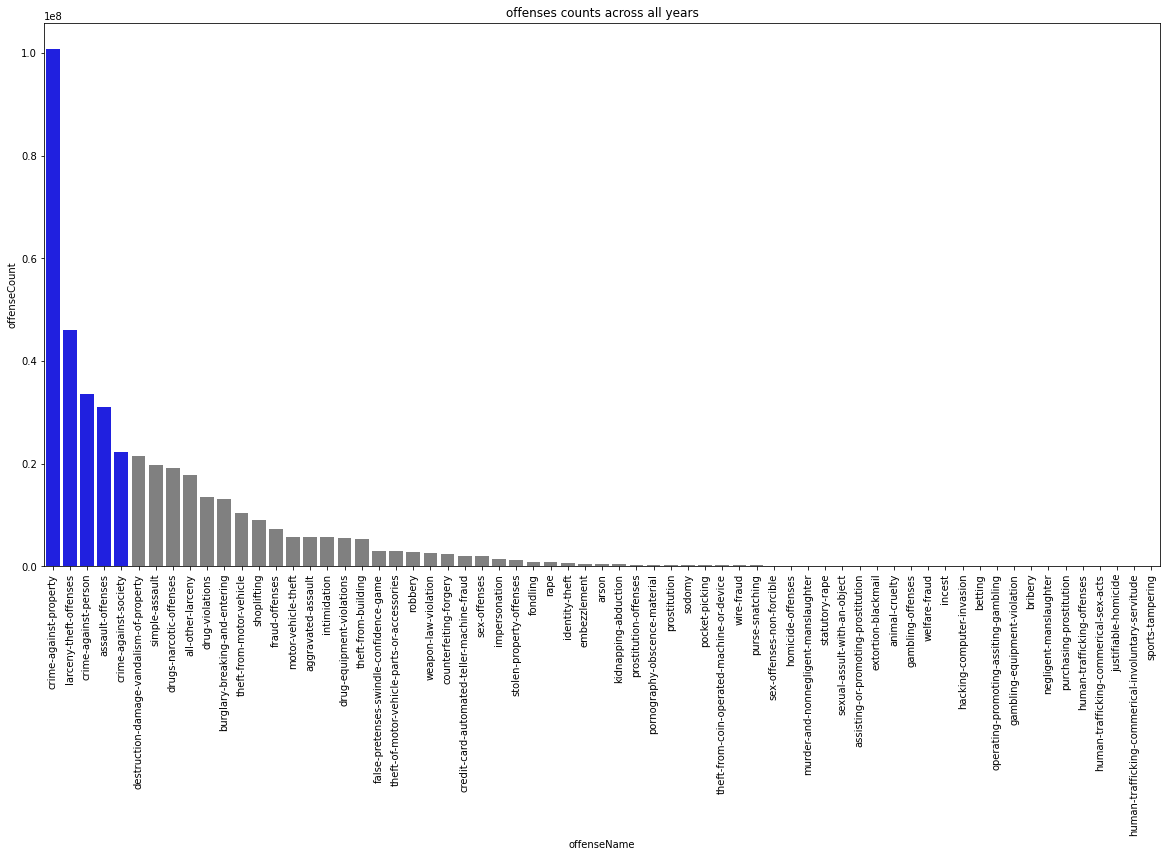

In [ ]:
sorted_group_off_name_all = group_off_name.apply(lambda x: x.sort_values(ascending=False))
sorted_group_off_name_dict = dict(sorted_group_off_name_all['offenseCount'])
offenseName = list(sorted_group_off_name_dict.keys())
new_dict_sorted = {'offenseName':[] , 'offenseCount':[]}
for i in range(len(offenseName)):
  new_dict_sorted['offenseName'].append(offenseName[i])
  new_dict_sorted['offenseCount'].append(sorted_group_off_name_dict[offenseName[i]])

sorted_group_off_name_df= pd.DataFrame(new_dict_sorted)

cols = ['grey' if (x < sorted_group_off_name['offenseCount'][4]) else 'blue' for x in sorted_group_off_name_df['offenseCount'] ]

plt.figure(figsize=(20,10))
bar = sns.barplot(data=sorted_group_off_name_df, x="offenseName", y="offenseCount", palette=cols)
plt.xticks(rotation='vertical')
plt.title("offenses counts across all years")

In [ ]:
offense_categories = sorted_group_off_name.index

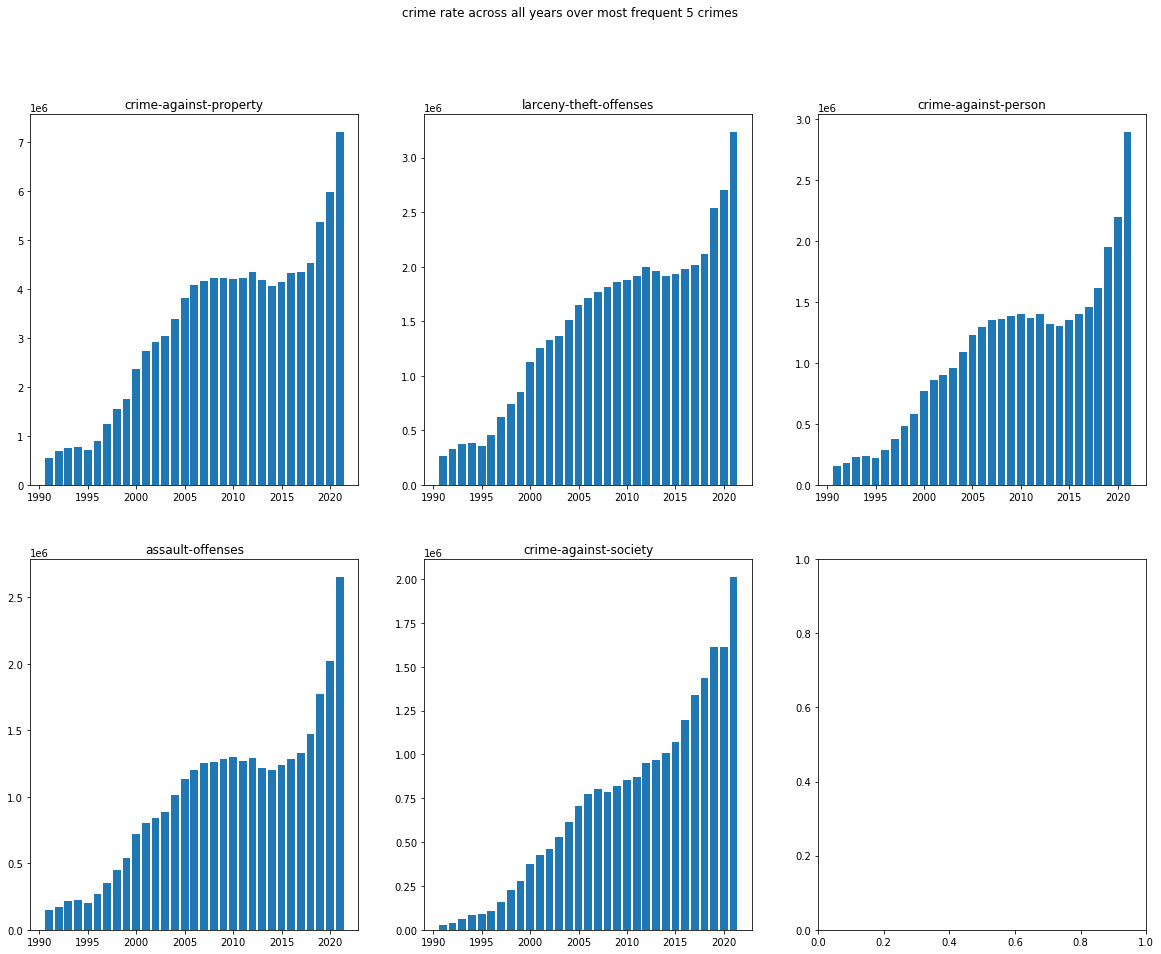

In [ ]:
#loop and plot for every g
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle("crime rate across all years over most frequent 5 crimes")
for i in range(5):
  ofensesReduced = offenseCount[(offenseCount['offenseName'] == offense_categories[i])]
  offense_count_rate = ofensesReduced.groupby(['Year'])[["offenseCount"]].sum()
  year = offense_count_rate.index
  off_counts = offense_count_rate.to_numpy()
  x = year
  y = off_counts[:,0]
  plt.subplot(2, 3, i+1)
  plt.bar(x,y)
  plt.gca().set_title(offense_categories[i])

plt.show()

# **2. The average percentage of violent crimes relative to total crime per state over all available years.**

In [ ]:
#offences count data set

#classify crimes to violent and non-violent crimes
all_violent_crime = ['assault-offenses','homicide-offenses', 'robbery','kidnapping-abduction','sexual-assult-with-an-object' ]
all_non_violent_crime = [x for x in offenses if x not in all_violent_crime]

off_copy = offenseCount.copy()
off_copy.replace(all_non_violent_crime,'non_violent_crime' , inplace = True)
off_copy.replace(all_violent_crime,'violent_crime' , inplace = True)


In [ ]:
off_copy.head()

,stateName,offenseName,offenseCount,Year
0,Hawaii,non_violent_crime,1364,2018
1,Hawaii,non_violent_crime,1413,2019
2,Hawaii,non_violent_crime,1364,2020
3,Hawaii,non_violent_crime,1505,2021
4,Hawaii,non_violent_crime,8680,2018


In [ ]:
grouped_data = off_copy.groupby(by=['offenseName','stateName'], group_keys=False).apply(lambda x: x['offenseCount'].sum())

In [ ]:
df = pd.DataFrame(grouped_data)

In [ ]:
df.shape

(102, 1)

In [ ]:
df[0].head(5)

offenseName        stateName 
non_violent_crime  Alabama        2454408
                   Alaska           38357
                   Arizona        1518056
                   Arkansas      10932111
                   California      379414
Name: 0, dtype: int64

In [ ]:
# dictionary with key as a tuble (offenseName, stateName): count
dictionary_violent = dict(df[0])

In [ ]:
off_state_tuple = list(dictionary_violent.keys())

In [ ]:
#to count the whole number in each state
crimes_sum = df.groupby(by=['stateName'], group_keys=False).sum()

In [ ]:
crimes_sum_dict = dict(crimes_sum)

In [ ]:
#list of state names 
states = list(crimes_sum_dict[0].keys())

In [ ]:
# form a data frame of states with percentages
precentages = {'stateName':[],'%':[]}
for i in range(len(states)):
    precentages['stateName'].append(states[i])
    precentages['%'].append(dictionary_violent[('violent_crime', states[i])]*100/crimes_sum_dict[0][states[i]])

In [ ]:
precentages = pd.DataFrame(precentages)
precentages.head()

,stateName,%
0,Alabama,8.871182
1,Alaska,12.735752
2,Arizona,6.278550
3,Arkansas,8.598501
4,California,8.314021


Text(0.5, 1.0, 'the percentage of the violent crime in each state')

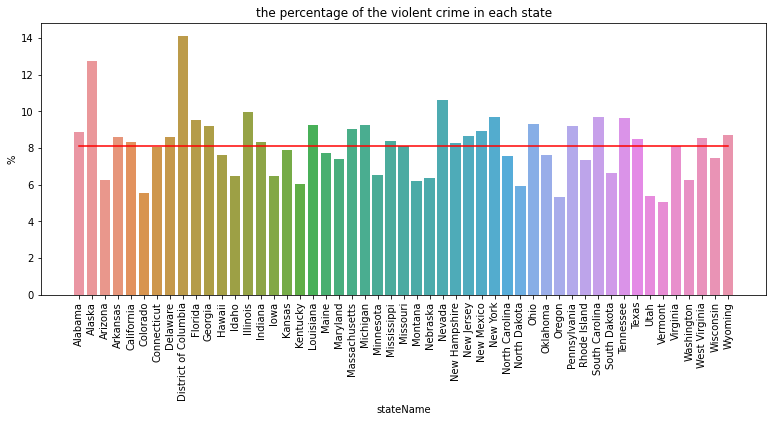

In [ ]:
#show the percentage of the violent crime in each state
plt.figure(figsize=(13,5))
sns.barplot(x = precentages['stateName'],y= precentages['%'])
plt.plot(precentages['stateName'], np.ones_like(precentages['%'])*precentages['%'].mean(), color='r')
plt.xticks(rotation='vertical')
plt.title('the percentage of the violent crime in each state')

In [ ]:
#make a data frame of violent and non violent 
new_dict = {'stateName':[] , 'offense':[] , 'count':[]}
for i in range(len(off_state_tuple)):
  new_dict['offense'].append(off_state_tuple[i][0])
  new_dict['stateName'].append(off_state_tuple[i][1])
  new_dict['count'].append(dictionary_violent[(off_state_tuple[i][0], off_state_tuple[i][1])])


In [ ]:
df_ = pd.DataFrame(new_dict)

Text(0.5, 1.0, 'compare between violent and non violent crimes to avoid bias')

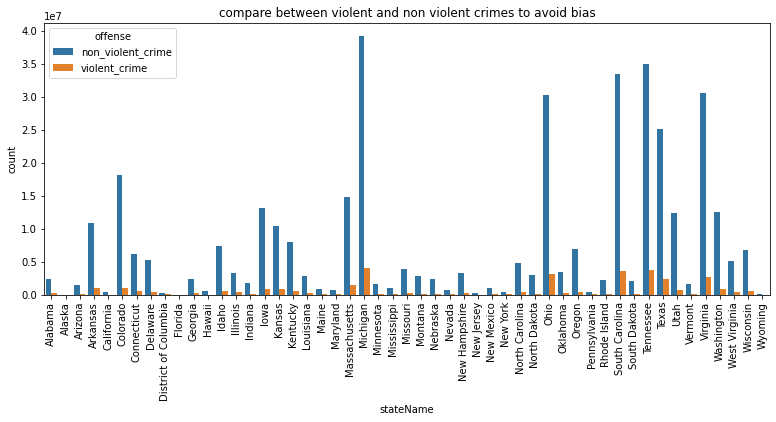

In [ ]:
# compare between violent and non violent crimes
# to neglect bias the could happen from the last graph if someome didn't recognize the numbers
plt.figure(figsize=(13,5))
sns.barplot(data=df_, x="stateName", y="count" ,hue="offense")
plt.xticks(rotation='vertical')
plt.title('compare between violent and non violent crimes to avoid bias')

# **3. National homicide rates, as well as total violent crime rates per year over all years.**

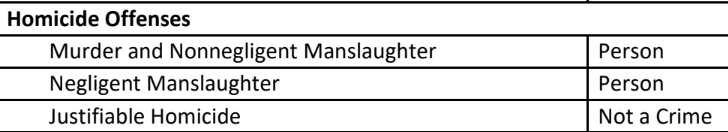

In [ ]:
#offences count data set

## violent_crime rates

In [ ]:
# group by year and offense name and counts values in each year
all_violent_crime = ['assault-offenses','homicide-offenses', 'robbery','kidnapping-abduction','sexual-assult-with-an-object' ]
grouped_data = off_copy.groupby(by=['Year','offenseName'], group_keys=False).apply(lambda x: x['offenseCount'].sum())

In [ ]:
year_violent_dict = dict(grouped_data)

In [ ]:
years = list(off_copy['Year'].unique())

In [ ]:
new_dict_off = {'year':[] , 'offense':[] ,'count':[]}
for i in range(len(years)):
  # offense dictionary construction
  new_dict_off['year'].append(years[i])
  new_dict_off['offense'].append('violent_crime')
  new_dict_off['count'].append(year_violent_dict[(years[i],'violent_crime')])
  

  

In [ ]:
off_df = pd.DataFrame(new_dict_off)


Text(0.5, 1.0, 'rate of violent crimes per year over all years')

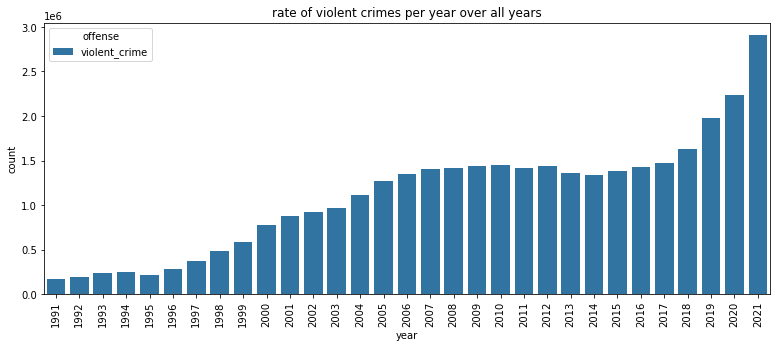

In [ ]:
# rate of violent crimes per year over all years
plt.figure(figsize=(13,5))
sns.barplot(data=off_df, x="year", y="count", hue = 'offense')

plt.xticks(rotation='vertical')
plt.title("rate of violent crimes per year over all years")

Text(0.5, 1.0, 'rate of violent crimes per year over all years')

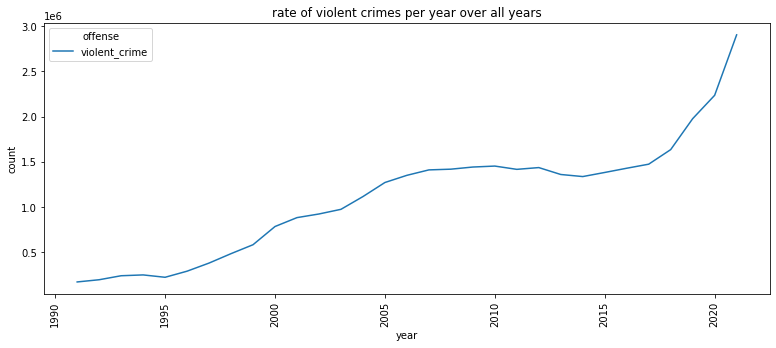

In [ ]:
# rate of violent crimes per year over all years
plt.figure(figsize=(13,5))
sns.lineplot(data=off_df, x="year", y="count", hue = 'offense')

plt.xticks(rotation='vertical')
plt.title("rate of violent crimes per year over all years")

## homicide offense rates

In [ ]:
homicide_offenses = ['murder-and-nonnegligent-manslaughter','negligent-manslaughter','justifiable-homicide']
non_homicide_offenses = [x for x in offenses if x not in homicide_offenses]

off_copy = offenseCount.copy()
off_copy.replace(non_homicide_offenses,'non_homicide_offenses' , inplace = True)
off_copy.replace(homicide_offenses,'homicide_offenses' , inplace = True)

In [ ]:
grouped_data = off_copy.groupby(by=['Year','offenseName'], group_keys=False).apply(lambda x: x['offenseCount'].sum())
year_violent_dict = dict(grouped_data)

In [ ]:
years = list(off_copy['Year'].unique())

In [ ]:
#make a data frame of violent and non violent 
new_dict_off = {'year':[] , 'offense':[] ,'count':[]}
for i in range(len(years)):
  # offense dictionary construction
  new_dict_off['year'].append(years[i])
  new_dict_off['offense'].append('homicide_offenses')
  new_dict_off['count'].append(year_violent_dict[(years[i],'homicide_offenses')])
  
  

In [ ]:
off_df = pd.DataFrame(new_dict_off)

Text(0.5, 1.0, 'rate of homicide per year over all years')

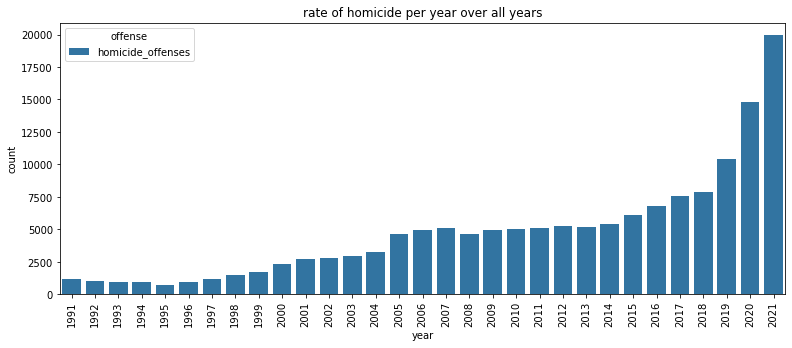

In [ ]:
# rate of homicide per year over all years
plt.figure(figsize=(13,5))
sns.barplot(data=off_df, x="year", y="count", hue = 'offense')
plt.xticks(rotation='vertical')
plt.title("rate of homicide per year over all years")

Text(0.5, 1.0, 'rate of homicide per year over all years')

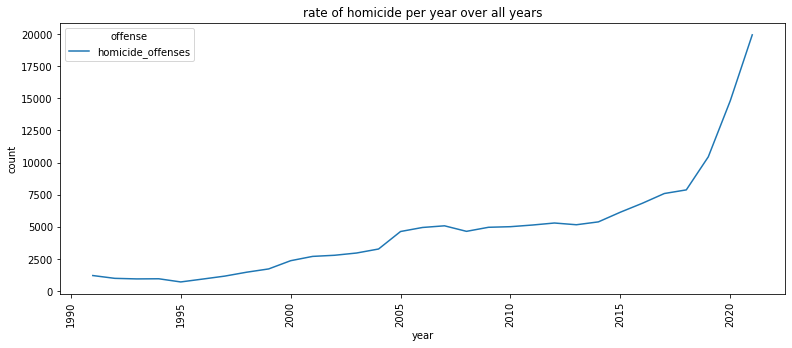

In [ ]:
# rate of homicide per year over all years
plt.figure(figsize=(13,5))
sns.lineplot(data=off_df, x="year", y="count", hue = 'offense')
plt.xticks(rotation='vertical')
plt.title("rate of homicide per year over all years")

# **4. The frequency of non-fatal crime incidents in relation to victim demographics**

In [ ]:
#Personal victimization dataset
#filter the fatal crime incedents from newoff column
# demographics: age, sex, race/ethnicity
#ethnicity, age/generation, gender, income, marital status, education, and homeownership, etc
#count frequencies for each crime depending on the victim demographics

## Demographics

In [ ]:
race = np.unique(Personal_victimization['race'])
age = np.unique(Personal_victimization['age_range'])
gender = np.unique(Personal_victimization['sex'])
Hispanic_origin = np.unique(Personal_victimization['hispanic'])

In [ ]:
race_counts = np.zeros(len(race))
age_counts = np.zeros(len(age))
gender_counts = np.zeros(len(gender))
Hispanic_origin_counts = np.zeros(len(Hispanic_origin))

## **Calculating the frequency of each demographic for the crimes**

In [ ]:
for i in range(len(Personal_victimization)):
  #age:
  index = np.where(age == Personal_victimization.loc[i,'age_range'])
  age_counts[index] = age_counts[index] + 1
  #sex:
  index = np.where(gender == Personal_victimization.loc[i,'sex'])
  gender_counts[index] = gender_counts[index] + 1
  #hispanic:
  index = np.where(Hispanic_origin == Personal_victimization.loc[i,'hispanic'])
  Hispanic_origin_counts[index] = Hispanic_origin_counts[index] + 1
  #race:
  index = np.where(race == Personal_victimization.loc[i,'race'])
  race_counts[index] = race_counts[index] + 1

## **Getting demographics total number from the population dataset for normalization**

In [ ]:
population_age = dict(Personal_population['age_range'].value_counts())
population_gender = dict(Personal_population['sex'].value_counts())
population_race = dict(Personal_population['race'].value_counts())
population_hispanic_origin = dict(Personal_population['hispanic'].value_counts())

## **Normalization**

### **Age**

In [ ]:
keys = list(population_age.keys())
keys
values = list(population_age.values())
values
for i in range(len(age)):
  index = np.where(age == keys[i])
  age_counts[index] = age_counts[index]/values[i]

In [ ]:
age_counts

array([0.02208101, 0.0218414 , 0.01525531, 0.01092767, 0.00658756,
       0.00245052])

### **Gender** 

In [ ]:
keys = list(population_gender.keys())
keys
values = list(population_gender.values())
values
for i in range(len(gender)):
  index = np.where(gender == keys[i])
  gender_counts[index] = gender_counts[index]/values[i]

### **Race**

In [ ]:
keys = list(population_race.keys())
keys
values = list(population_race.values())
values
for i in range(len(race)):
  index = np.where(race == keys[i])
  race_counts[index] = race_counts[index]/values[i]

In [ ]:
keys = list(population_hispanic_origin.keys())
keys
values = list(population_hispanic_origin.values())
values
for i in range(len(Hispanic_origin)):
  index = np.where(Hispanic_origin == keys[i])
  Hispanic_origin_counts[index] = Hispanic_origin_counts[index]/values[i]

## Plotting

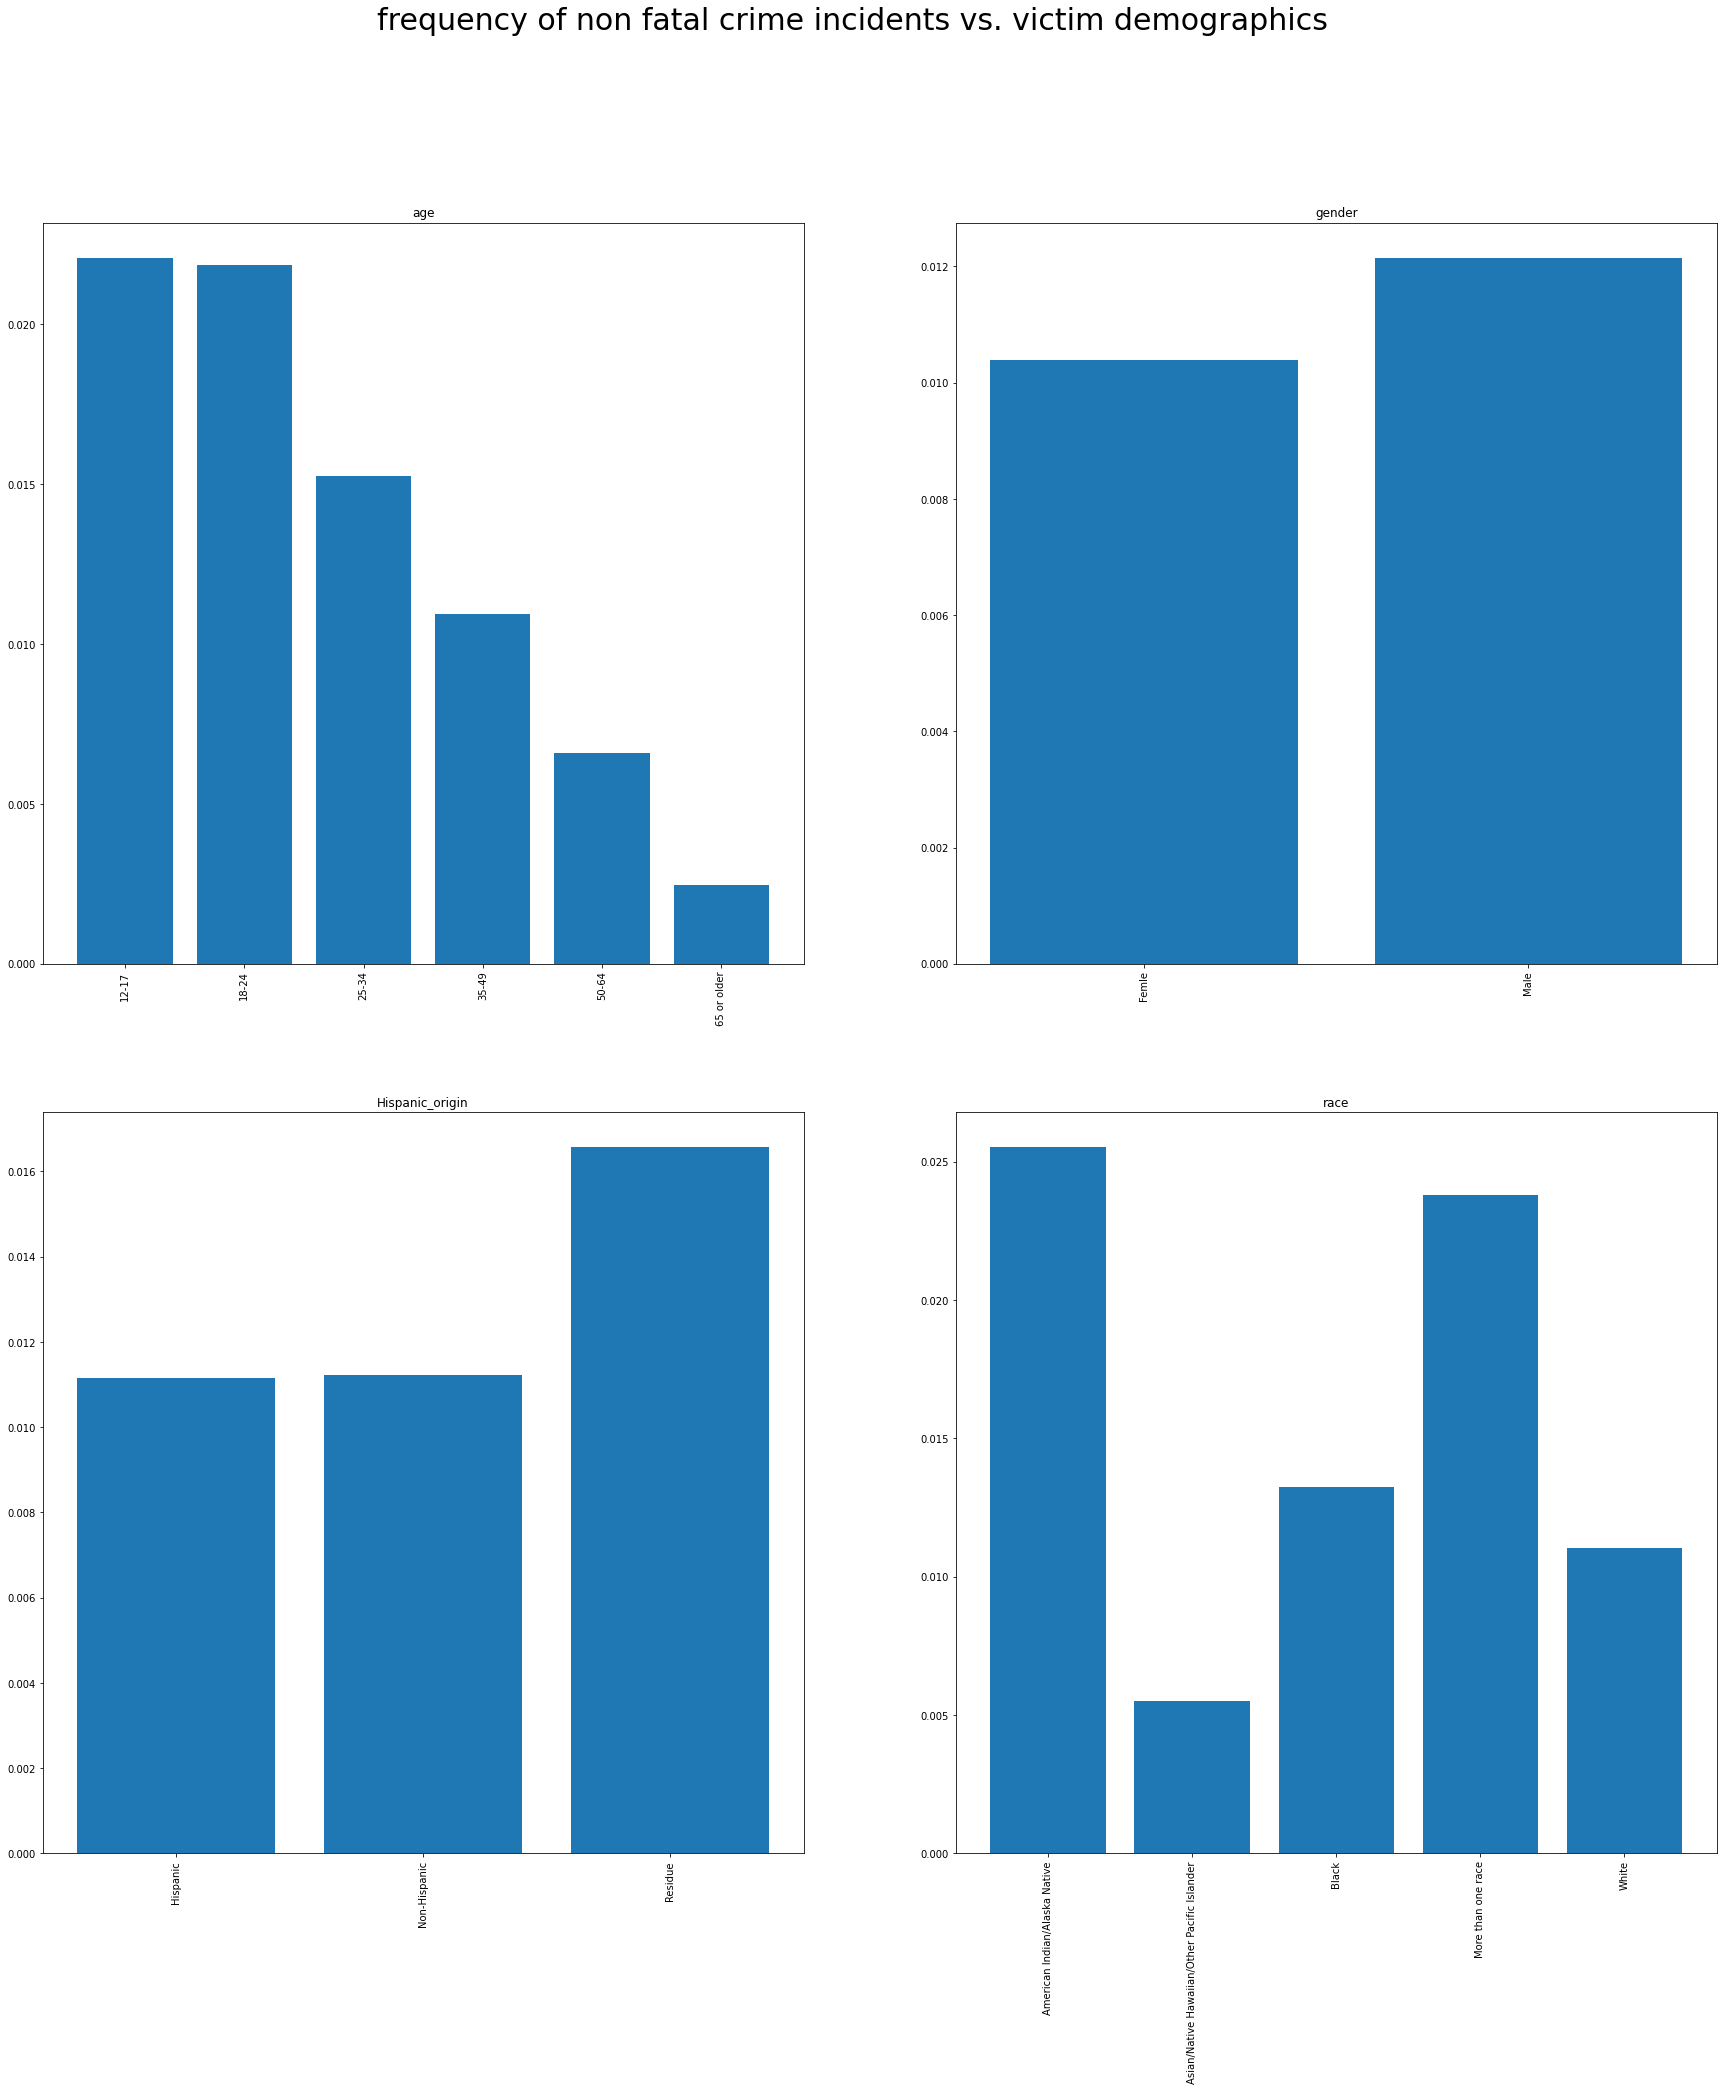

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(30, 30))
fig.suptitle("frequency of non fatal crime incidents vs. victim demographics" , fontsize=30)

x = age
y = age_counts
plt.subplot(2, 2, 1)
plt.bar(x,y)
plt.gca().set_title('age')
plt.xticks(rotation='vertical')

x = gender
y = gender_counts
plt.subplot(2, 2, 2)
plt.bar(x,y)
plt.gca().set_title('gender')
plt.xticks(rotation='vertical')


x = Hispanic_origin
y = Hispanic_origin_counts
plt.subplot(2, 2, 3)
plt.bar(x,y)
plt.gca().set_title('Hispanic_origin')
plt.xticks(rotation='vertical')

x = race
y = race_counts
plt.subplot(2, 2, 4)
plt.bar(x,y)
plt.gca().set_title('race')
plt.xticks(rotation='vertical')


plt.show()

# **5. The frequency of non-fatal crime incidents in relation to offender demographics.**

In [ ]:
#Personal victimization dataset
#filter the fatal crime incedents from newoff column
#ethnicity, age/generation, gender, income, marital status, education, and homeownership, etc
#count frequencies for each crime depending on the offender demographics

## Demographics

In [ ]:
offender_gender = np.unique(Personal_victimization['offendersex'])
offender_race = np.unique(Personal_victimization['offtracenew'])
offender_age = np.unique(Personal_victimization['offenderage'])

In [ ]:
offender_gender_counts = np.zeros(len(offender_gender))
offender_race_counts = np.zeros(len(offender_race))
offender_age_counts = np.zeros(len(offender_age))

In [ ]:
for i in range(len(Personal_victimization)):
  #age
  index = np.where(offender_age == Personal_victimization.loc[i,'offenderage'])
  offender_age_counts[index] = offender_age_counts[index] + 1
  #sex
  index = np.where(offender_gender == Personal_victimization.loc[i,'offendersex'])
  offender_gender_counts[index] = offender_gender_counts[index] + 1
  #race
  index = np.where(offender_race == Personal_victimization.loc[i,'offtracenew'])
  offender_race_counts[index] = offender_race_counts[index] + 1

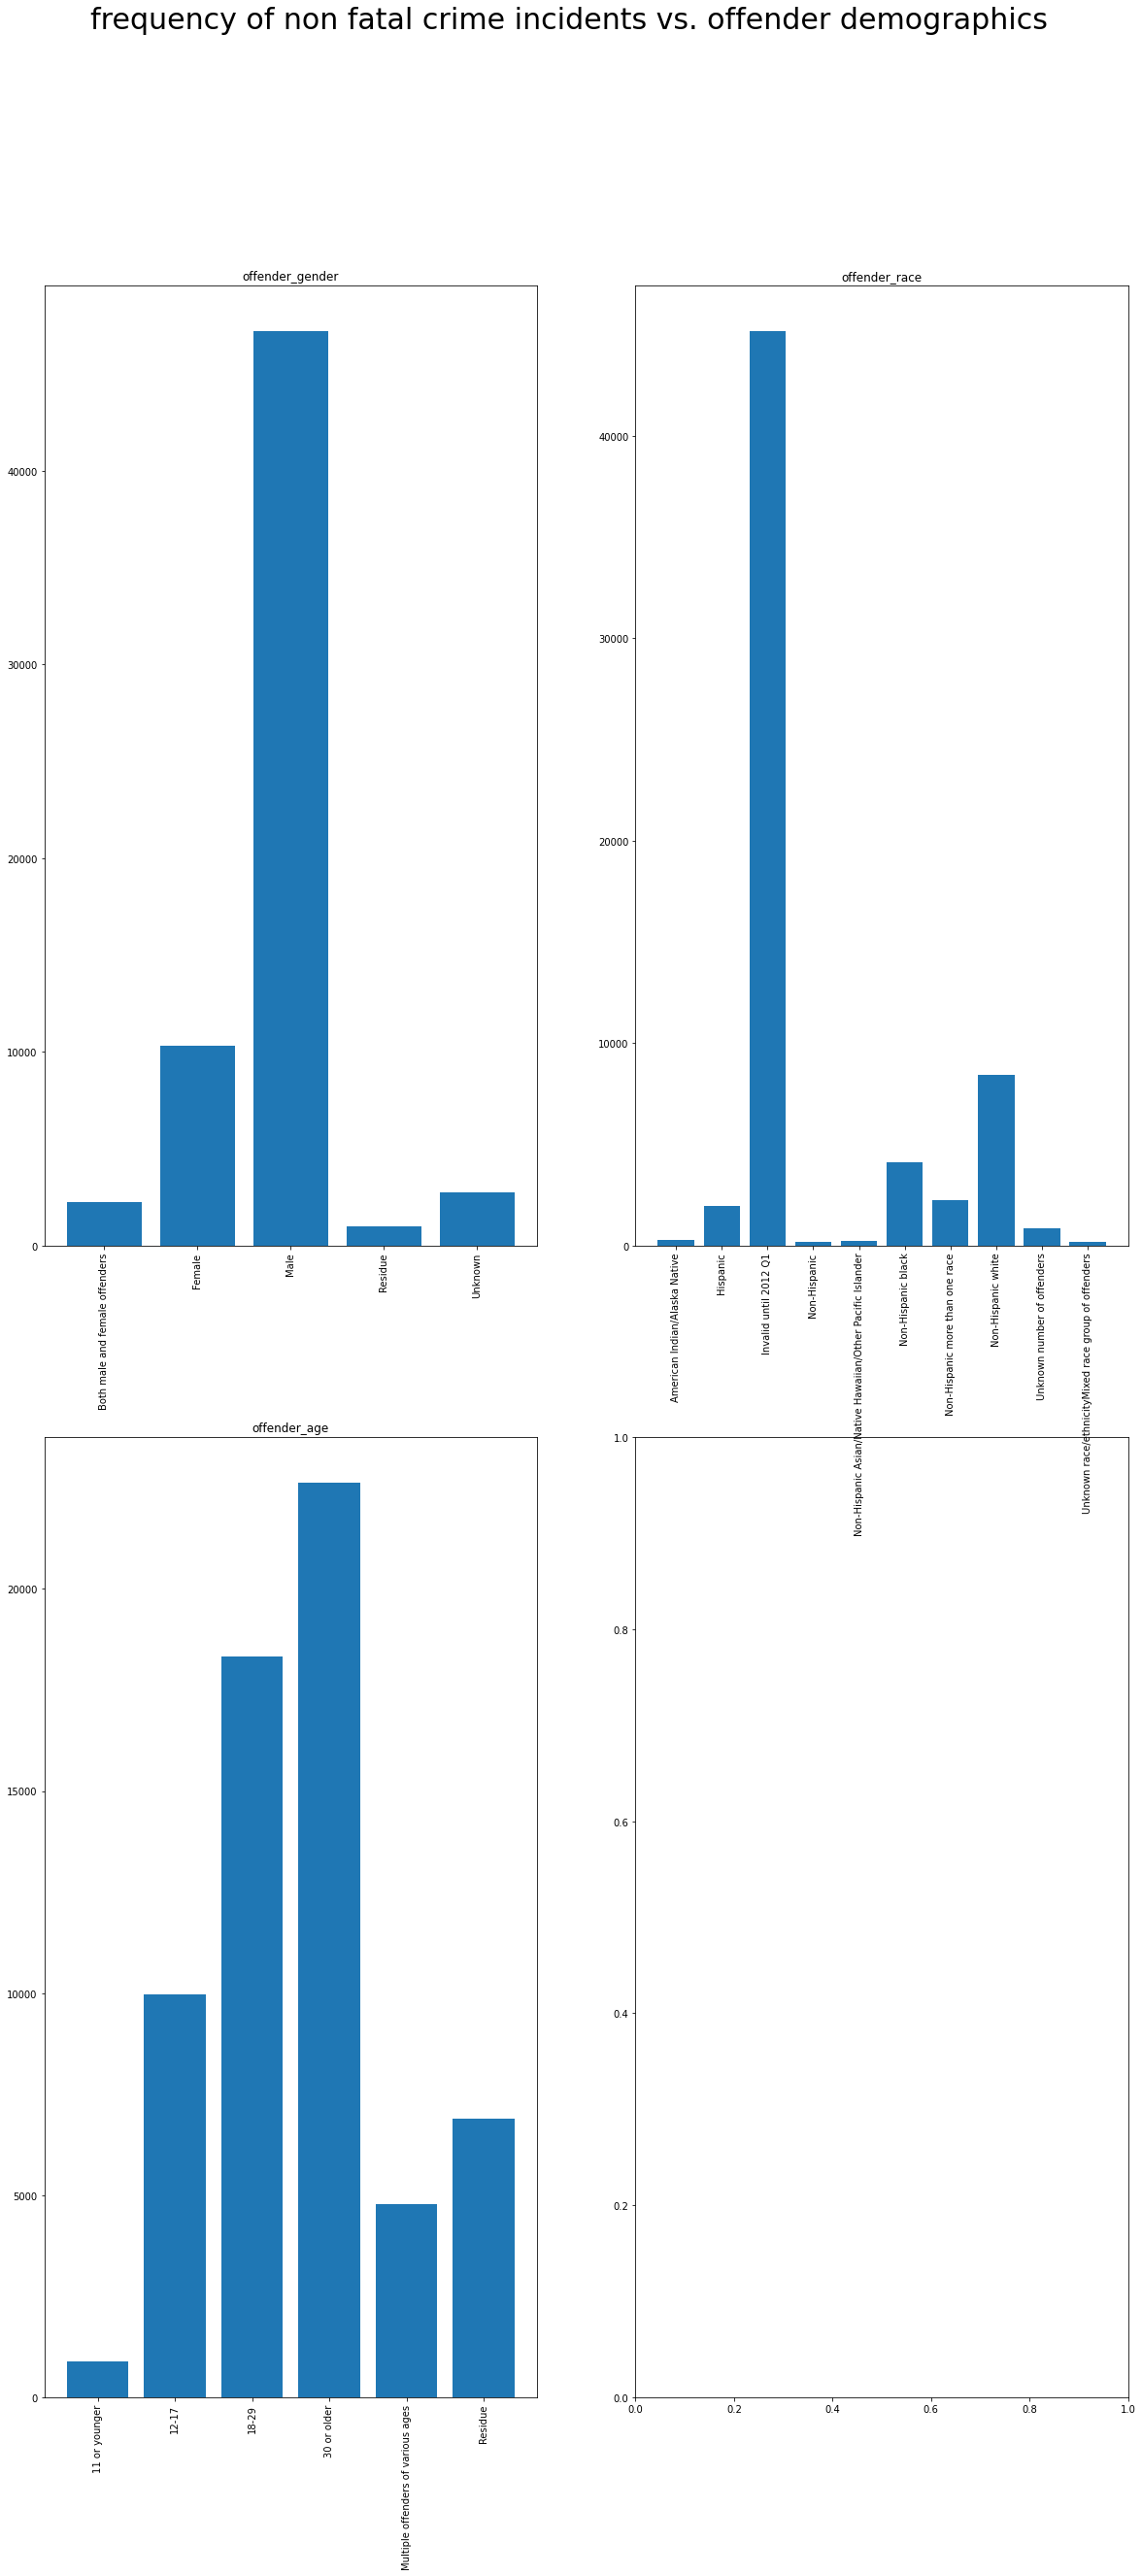

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 40))
fig.suptitle("frequency of non fatal crime incidents vs. offender demographics",fontsize = 30)
x = offender_gender
y = offender_gender_counts
plt.subplot(2, 2, 1)
plt.bar(x,y)
plt.gca().set_title('offender_gender')
plt.xticks(rotation='vertical')

x = offender_race
y = offender_race_counts
plt.subplot(2, 2, 2)
plt.bar(x,y)
plt.gca().set_title('offender_race')
plt.xticks(rotation='vertical')

x = offender_age
y = offender_age_counts
plt.subplot(2, 2, 3)
plt.bar(x,y)
plt.gca().set_title('offender_age')
plt.xticks(rotation='vertical')

plt.show()

# **6. The relationship between the victim’s education level, their gross household income, and their rate of victimization.**

In [ ]:
interest_features = ['education_level','house_hold_income','series']
interest_df = Personal_victimization[interest_features]
interest_df.head()

,education_level,house_hold_income,series
0,High school,"Less than $7,500",Not a series crime
1,High school,"$75,000 or more",Not a series crime
2,High school,"$35,000 to $49,999",Not a series crime
3,High school,"$35,000 to $49,999",Not a series crime
4,College,"$50,000 to $74,999",Not a series crime


## Imagination about the data nature and the count of each feature

Text(0.5, 1.0, 'count of each education category for all population')

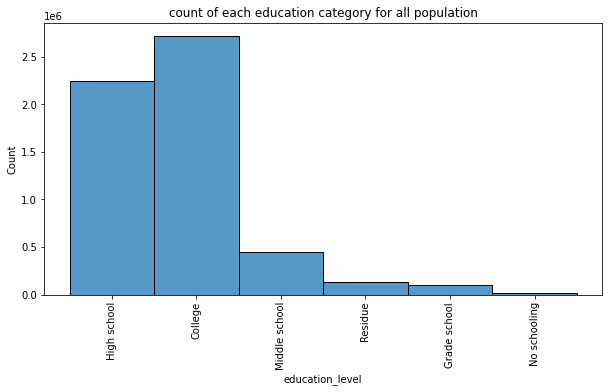

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(Personal_population, x="education_level")
plt.xticks(rotation='vertical')
plt.title("count of each education category for all population")

Text(0.5, 1.0, 'count of each education category for victims')

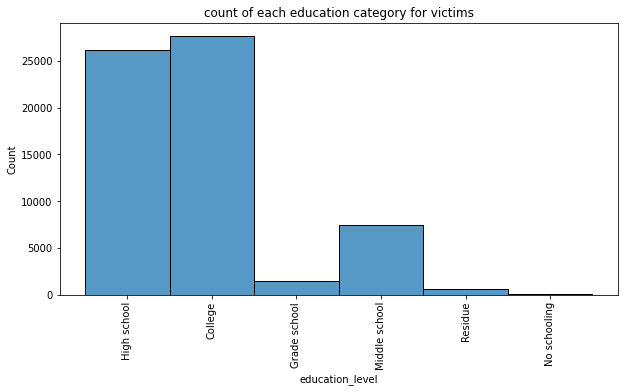

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(interest_df, x="education_level")
plt.xticks(rotation='vertical')
plt.title("count of each education category for victims")

Text(0.5, 1.0, 'counts of house hold income categories for all population')

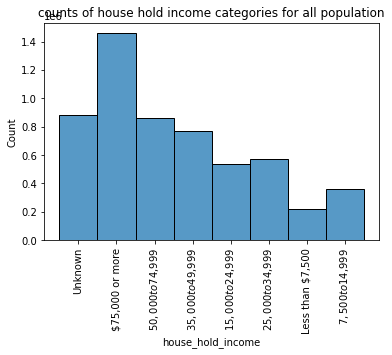

In [ ]:
sns.histplot(Personal_population, x="house_hold_income")
plt.xticks(rotation='vertical')
plt.title("counts of house hold income categories for all population")

Text(0.5, 1.0, 'counts of house hold income categories for victims')

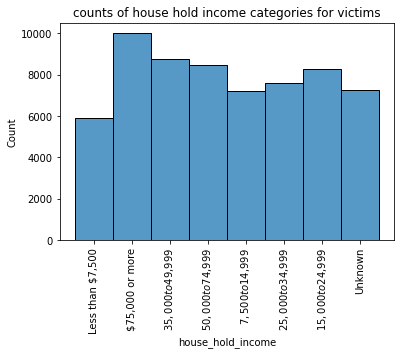

In [ ]:
sns.histplot(interest_df, x="house_hold_income")
plt.xticks(rotation='vertical')
plt.title("counts of house hold income categories for victims")

Text(0.5, 1.0, 'the number of with and without series of crimes')

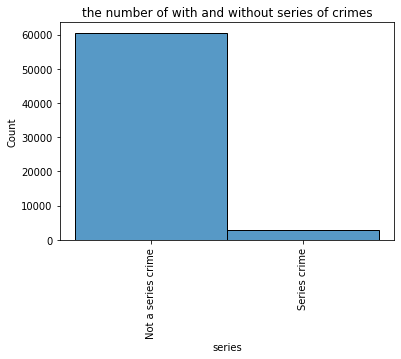

In [ ]:
sns.histplot(interest_df, x="series")
plt.xticks(rotation='vertical')
plt.title('the number of with and without series of crimes')

## Relationship between each feature

In [ ]:
#we used the pair plot first, but there were a problem in making the x_axis of each plot vertically to see it well

Text(0.5, 1.0, 'relation between house hold income and series of crime')

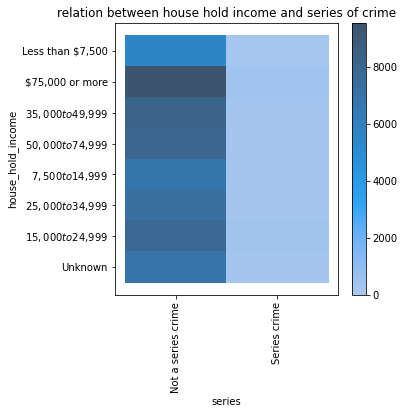

In [ ]:
plt.figure(figsize=(5,5))

sns.histplot(data=interest_df, x="series", y = "house_hold_income" ,cbar =True)

plt.xticks(rotation='vertical')
plt.title("relation between house hold income and series of crime")

Text(0.5, 1.0, 'relation between house hold income and education level')

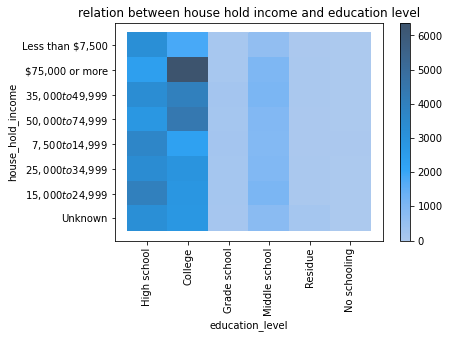

In [ ]:
# plt.figure(figsize=(5,5))
sns.histplot(data=interest_df, x="education_level", y = "house_hold_income" ,cbar =True)
plt.xticks(rotation='vertical')
plt.title("relation between house hold income and education level")

Text(0.5, 1.0, 'relation between education level and series of crime')

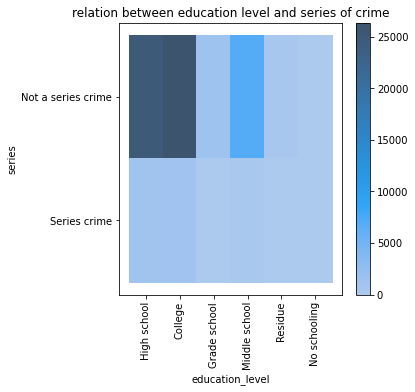

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=interest_df, x="education_level", y = "series",cbar =True)
plt.xticks(rotation='vertical')
plt.title("relation between education level and series of crime")

# **PART 3: Answering Questions:**

## **1. Which type of non-fatal crime is the most under-reported? Is there an association between the offender-victim relationship and the likelihood of a crime being reported? (reported: ie, police notified at time of occurrence)**

In [ ]:
#personal victimization dataset:
#a)Which type of non-fatal crime is the most under-reported?
#get nonfatal crimes + not reported + group by crime

#b)Is there an association between the offender-victim relationship and the likelihood of a crime being reported?


In [ ]:
under_reported_crimes = Personal_victimization[['notify','offense_type']][(Personal_victimization['notify']!='Yes')]

In [ ]:
under_reported_crimes.head(5)

,notify,offense_type
2,No,Simple assault
4,No,Simple assault
6,No,Robbery
7,No,Simple assault
8,No,Aggravated assault


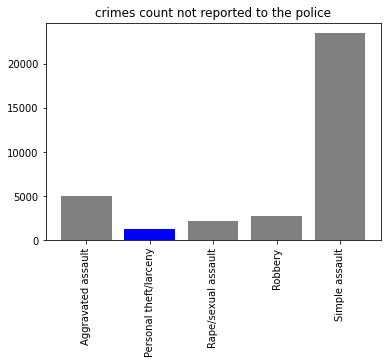

In [ ]:
group_under_reported = under_reported_crimes.groupby(['offense_type'])[["notify"]].count()
notify_counts = group_under_reported.to_numpy()  
x = group_under_reported.index
y = notify_counts[:,0]
c = ['grey', 'blue', 'grey', 'grey', 'grey']
plt.bar(x,y, color = c)
plt.xticks(rotation='vertical')
plt.title('crimes count not reported to the police')
plt.show()

In [ ]:
group_under_reported

,notify
offense_type,
Aggravated assault,5056
Personal theft/larceny,1256
Rape/sexual assault,2146
Robbery,2725
Simple assault,23498


In [ ]:
relation_crime_reported = Personal_victimization[['notify','victim_offender_relation']][(Personal_victimization['notify']=='Yes')]

In [ ]:
relation_crime_reported.head()

,notify,victim_offender_relation
0,Yes,Intimates
1,Yes,Strangers
3,Yes,Do not know relationship
5,Yes,Strangers
10,Yes,Strangers


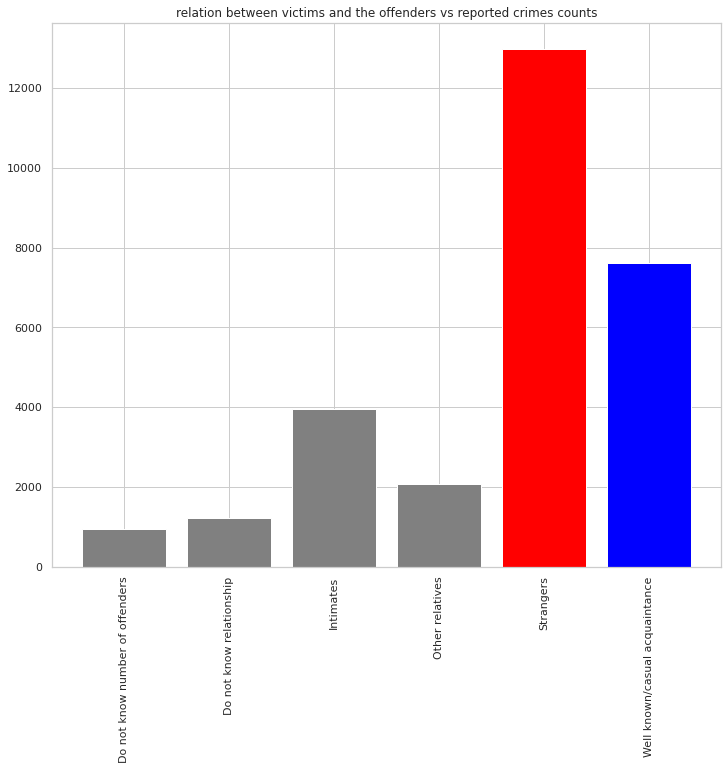

In [ ]:
group_relation_crime_reported = relation_crime_reported.groupby(['victim_offender_relation'])[["notify"]].count()
notify_counts = group_relation_crime_reported.to_numpy()  
x = group_relation_crime_reported.index
y = notify_counts[:,0]
c = ['grey', 'grey', 'grey', 'grey', 'red','blue']
plt.bar(x,y,color = c)
plt.xticks(rotation='vertical')
plt.title('relation between victims and the offenders vs reported crimes counts')
plt.show()

In [ ]:
group_relation_crime_reported

,notify
victim_offender_relation,
Do not know number of offenders,950
Do not know relationship,1224
Intimates,3941
Other relatives,2080
Strangers,12983
Well known/casual acquaintance,7606


# **2. Who are the people (the demographic segment) that appear to be most at risk of violent victimization? Who is the least at risk?**


In [ ]:
# demographics: age, sex, race/ethnicity

#all_violent_crime = ['assault_offenses','homicide_offenses', 'robbery','kidnapping_abduction','sexual_assault' ]

In [ ]:
demographics_risk = Personal_victimization[['age_range','sex','race','hispanic','offense_type']]

In [ ]:
group_demographics_risk = demographics_risk.groupby(['age_range','sex','race','hispanic'])[['offense_type']].count()
group_demographics_risk

offense_type
age_range   sex   race                                         hispanic                  
12-17       Femle American Indian/Alaska Native                Hispanic                 4
                                                               Non-Hispanic            43
                  Asian/Native Hawaiian/Other Pacific Islander Hispanic                 7
                                                               Non-Hispanic            68
                  Black                                        Hispanic                26
...                                                                                   ...
65 or older Male  More than one race                           Hispanic                 9
                                                               Non-Hispanic             9
                  White                                        Hispanic                81
                                                               Non-Hispanic           916
                                                               Residue                  4

[148 rows x 1 columns]

In [ ]:
g1 = demographics_risk.groupby(['age_range'])[['offense_type']].count()
g2 = demographics_risk.groupby(['sex'])[['offense_type']].count()
g3 = demographics_risk.groupby(['race'])[['offense_type']].count()
g4 = demographics_risk.groupby(['hispanic'])[['offense_type']].count()

In [ ]:
g1.head()

,offense_type
age_range,
12-17,11738
18-24,11793
25-34,13522
35-49,15743
50-64,8199


## **Normalization**

### **Age**

In [ ]:
age_offense_type_count = (g1.values.reshape((-1,))).astype(float)
age_index = g1.index
keys = list(population_age.keys())
values = list(population_age.values())
for i in range(len(age_index)):
  index = np.where(age_index == keys[i])
  age_offense_type_count[index[0][0]] = float(age_offense_type_count[index[0][0]])/float(values[i])

### **Gender**

In [ ]:
gender_offense_type_count = (g2.values.reshape((-1,))).astype(float)
gender_index = g2.index
keys = list(population_gender.keys())
values = list(population_gender.values())
for i in range(len(gender_index)):
  index = np.where(gender_index == keys[i])
  gender_offense_type_count[index[0][0]] = gender_offense_type_count[index[0][0]]/values[i]


### **Race**

In [ ]:
race_offense_type_count = (g3.values.reshape((-1,))).astype(float)
race_index = g3.index
keys = list(population_race.keys())
values = list(population_race.values())
for i in range(len(race_index)):
  index = np.where(race_index == keys[i])
  race_offense_type_count[index[0][0]] = race_offense_type_count[index[0][0]]/values[i]


### **Hispanic origion**

In [ ]:
hispanic_offense_type_count = (g4.values.reshape((-1,))).astype(float)
hispanic_index = g4.index
keys = list(population_hispanic_origin.keys())
values = list(population_hispanic_origin.values())
for i in range(len(hispanic_index)):
  index = np.where(hispanic_index == keys[i])
  hispanic_offense_type_count[index[0][0]] = hispanic_offense_type_count[index[0][0]]/values[i]


## **Plotting**

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

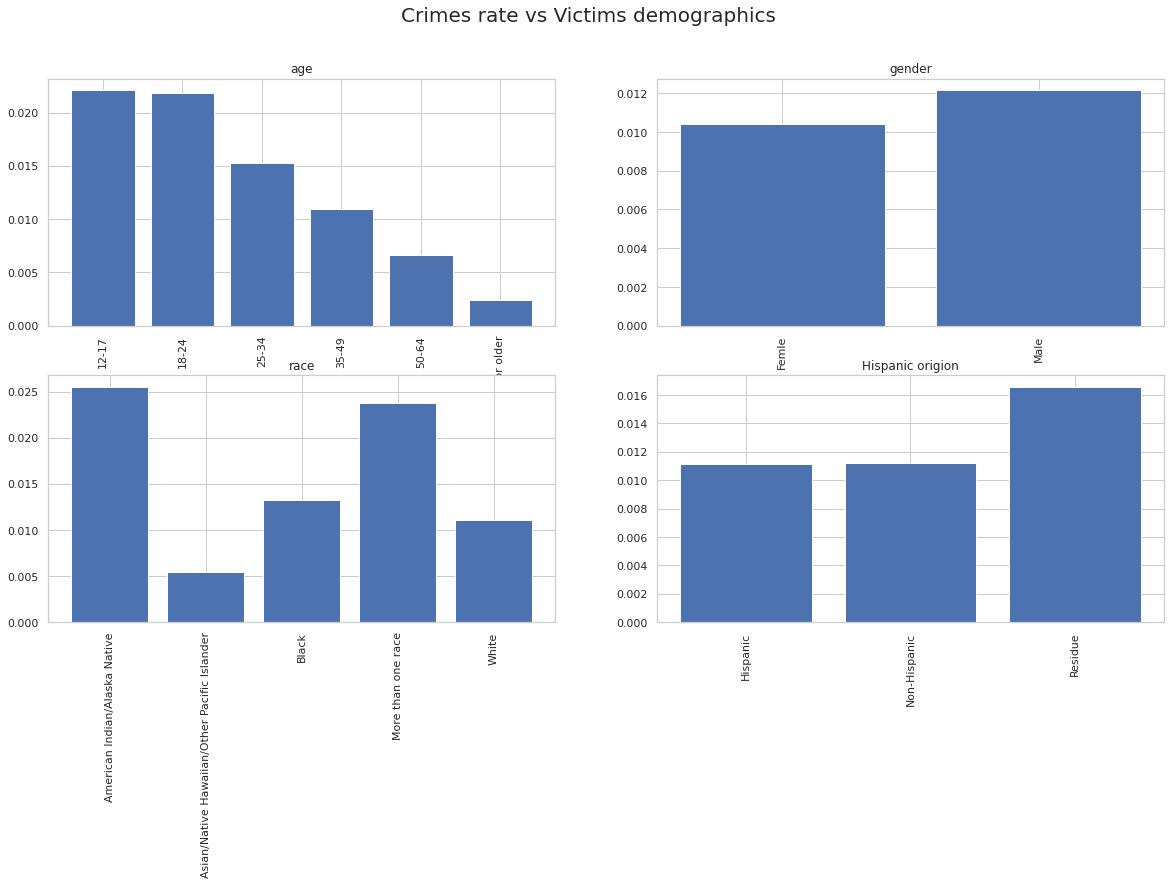

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Crimes rate vs Victims demographics', fontsize=20)

x = age_index.tolist()
y = age_offense_type_count
plt.subplot(2, 2, 1)
plt.bar(x,y)
plt.gca().set_title('age')
plt.xticks(rotation='vertical')

x = gender_index.tolist()
y = gender_offense_type_count
plt.subplot(2, 2, 2)
plt.bar(x,y)
plt.gca().set_title('gender')
plt.xticks(rotation='vertical')

x = race_index.tolist()
y = race_offense_type_count
plt.subplot(2, 2, 3)
plt.bar(x,y)
plt.gca().set_title('race')
plt.xticks(rotation='vertical')

x = hispanic_index.tolist()
y = hispanic_offense_type_count
plt.subplot(2, 2, 4)
plt.bar(x,y)
plt.gca().set_title('Hispanic origion')
plt.xticks(rotation='vertical')

# **3. Of all victims of non-fatal crimes who suffer an injury, which demographic is the most likely to receive medical attention at the scene? Which is the least likely?**

## Getting Demographics-treatment columns excluding the not injured casses

In [ ]:
injury_treatment = Personal_victimization[['age_range','sex','race','hispanic','injury_type','treatment']][(Personal_victimization['injury_type'] != 'No injury')] 

## Demographics grouped_by dataframe

In [ ]:
age_group = injury_treatment.groupby(['age_range','treatment'])["treatment"].count()
gender_group = injury_treatment.groupby(['sex','treatment'])["treatment"].count()
race_group = injury_treatment.groupby(['race','treatment'])["treatment"].count()
hispanic_group = injury_treatment.groupby(['hispanic','treatment'])["treatment"].count()

## **Treatment percentage visualization**

In [ ]:
age_group_dict = dict(age_group)
age_ranges = list(injury_treatment['age_range'].unique())
age_precetage = {'age_range':[],'%':[]}
# age_keys_list = age_group_dict.keys()
for i in range(len(age_ranges)):
  perecentage = age_group_dict[(age_ranges[i],'Treated at scene,home, medical office,or other location')] /(age_group_dict[(age_ranges[i],'Treated at scene,home, medical office,or other location')]+age_group_dict[(age_ranges[i],'Not treated')])
  age_precetage['age_range'].append(age_ranges[i])
  age_precetage['%'].append(perecentage)
  
age_df = pd.DataFrame(age_precetage)

Text(0.5, 1.0, 'percentages of treatment vs non treatment per age')

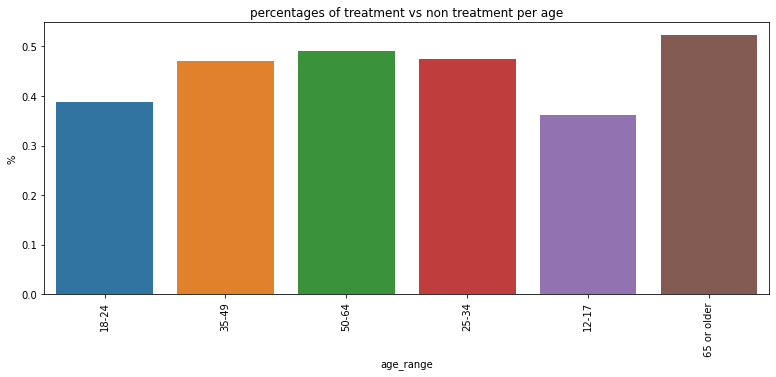

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(data=age_df, x="age_range", y="%")
plt.xticks(rotation='vertical')
plt.title("percentages of treatment vs non treatment per age")

Text(0.5, 1.0, 'percentages of treatment vs non treatment per gender')

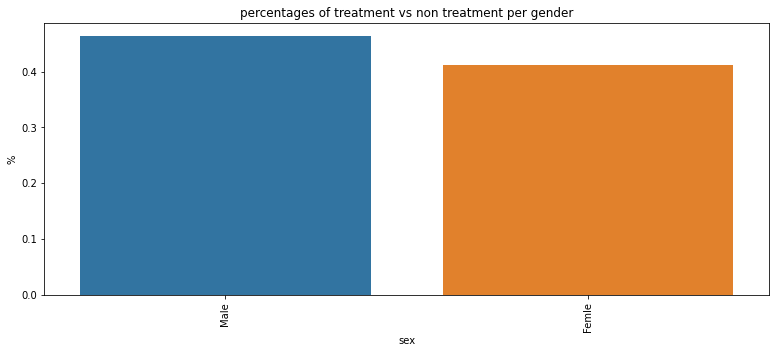

In [ ]:
gender_group_dict = dict(gender_group)
gender = list(injury_treatment['sex'].unique())
gender_precetage = {'sex':[],'%':[]}
# age_keys_list = age_group_dict.keys()
for i in range(len(gender)):
  perecentage = gender_group_dict[(gender[i],'Treated at scene,home, medical office,or other location')] /(gender_group_dict[(gender[i],'Treated at scene,home, medical office,or other location')]+gender_group_dict[(gender[i],'Not treated')])
  gender_precetage['sex'].append(gender[i])
  gender_precetage['%'].append(perecentage)
  
gender_df = pd.DataFrame(gender_precetage)

plt.figure(figsize=(13,5))
sns.barplot(data=gender_df, x="sex", y="%")
plt.xticks(rotation='vertical')
plt.title("percentages of treatment vs non treatment per gender")

Text(0.5, 1.0, 'percentages of treatment vs non treatment per race')

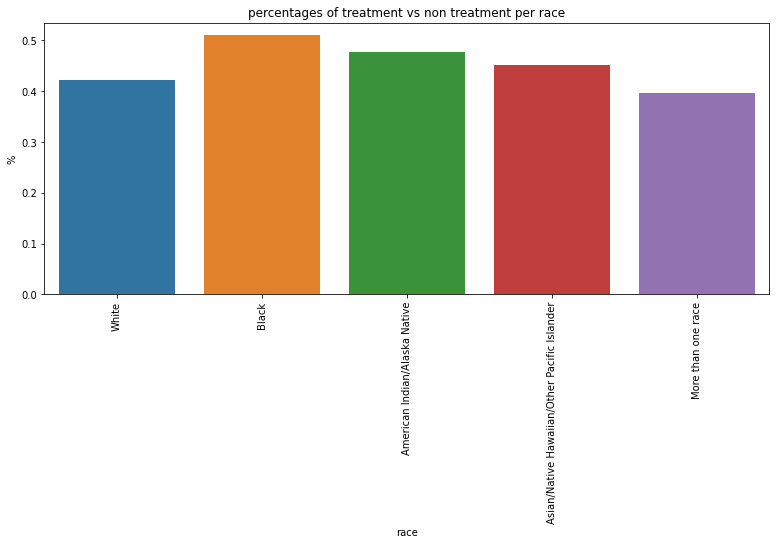

In [ ]:
race_group_dict = dict(race_group)
race = list(injury_treatment['race'].unique())
race_precetage = {'race':[],'%':[]}
# age_keys_list = age_group_dict.keys()
for i in range(len(race)):
  perecentage = race_group_dict[(race[i],'Treated at scene,home, medical office,or other location')] /(race_group_dict[(race[i],'Treated at scene,home, medical office,or other location')]+race_group_dict[(race[i],'Not treated')])
  race_precetage['race'].append(race[i])
  race_precetage['%'].append(perecentage)
  
race_df = pd.DataFrame(race_precetage)

plt.figure(figsize=(13,5))
sns.barplot(data=race_df, x="race", y="%")
plt.xticks(rotation='vertical')
plt.title("percentages of treatment vs non treatment per race")

Text(0.5, 1.0, 'percentages of treatment vs non treatment per hispanic')

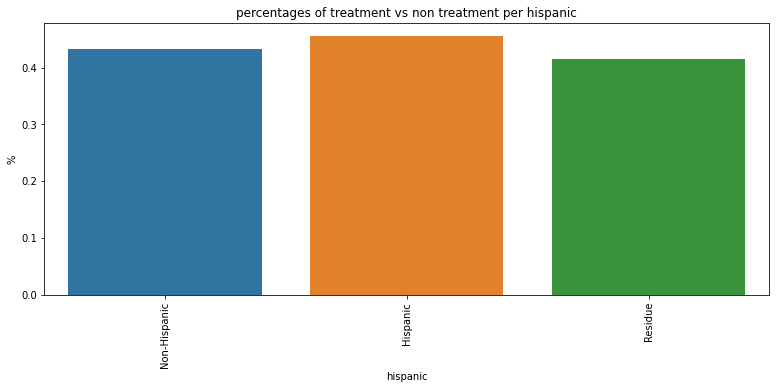

In [ ]:
hispanic_group_dict = dict(hispanic_group)
hispanic = list(injury_treatment['hispanic'].unique())
hispanic_precetage = {'hispanic':[],'%':[]}
# age_keys_list = age_group_dict.keys()
for i in range(len(hispanic)):
  perecentage = hispanic_group_dict[(hispanic[i],'Treated at scene,home, medical office,or other location')] /(hispanic_group_dict[(hispanic[i],'Treated at scene,home, medical office,or other location')]+hispanic_group_dict[(hispanic[i],'Not treated')])
  hispanic_precetage['hispanic'].append(hispanic[i])
  hispanic_precetage['%'].append(perecentage)
  
hispanic_df = pd.DataFrame(hispanic_precetage)

plt.figure(figsize=(13,5))
sns.barplot(data=hispanic_df, x="hispanic", y="%")
plt.xticks(rotation='vertical')
plt.title("percentages of treatment vs non treatment per hispanic")

## **Normalization and plotting**

### **Age**

In [ ]:
g_normalize = age_group.unstack()

In [ ]:
age_offense_type_count = g_normalize.values.astype(float)
age_index = g_normalize.index
keys = list(population_age.keys())
values = list(population_age.values())
for i in range(len(age_index)):
  index = np.where(age_index == keys[i])
  age_offense_type_count[index[0][0]] = (age_offense_type_count[index[0][0]])/float(values[i])

In [ ]:
age_offense_type_count

array([[1.12869365e-05, 3.83943957e-03, 2.16521065e-03],
       [1.29644515e-05, 3.75598680e-03, 2.38916320e-03],
       [5.64092150e-06, 1.99237347e-03, 1.80283851e-03],
       [9.02367326e-06, 1.31884455e-03, 1.17307752e-03],
       [9.64150475e-06, 6.58836158e-04, 6.35535855e-04],
       [1.98422344e-06, 2.01398679e-04, 2.20248802e-04]])

In [ ]:
Dont_know = [item[0] for item in age_offense_type_count]
Not_Treated = [item[1] for item in age_offense_type_count]
Treated = [item[2] for item in age_offense_type_count]

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

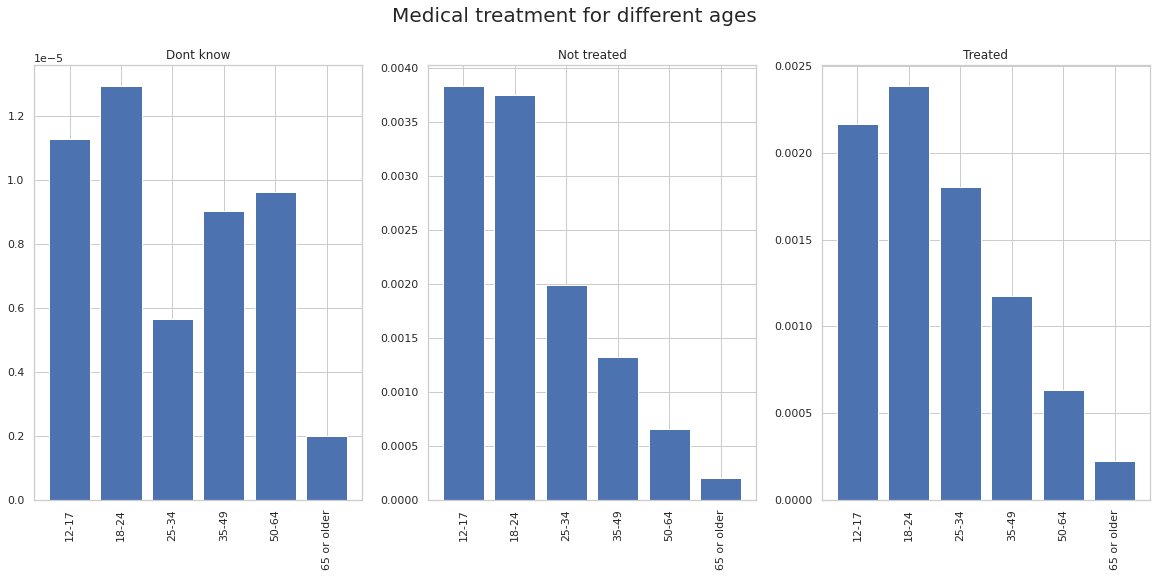

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Medical treatment for different ages', fontsize=20)
x = age_index

plt.subplot(1, 3, 1)
plt.bar(x,Dont_know)
plt.gca().set_title('Dont know')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 2)
plt.bar(x,Not_Treated)
plt.gca().set_title('Not treated')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 3)
plt.bar(x,Treated)
plt.gca().set_title('Treated')
plt.xticks(rotation='vertical')

### **Gender**

In [ ]:
g_normalize = gender_group.unstack()

In [ ]:
gender_offense_type_count = g_normalize.values.astype(float)
gender_index = g_normalize.index
keys = list(population_gender.keys())
values = list(population_gender.values())
for i in range(len(gender_index)):
  index = np.where(gender_index == keys[i])
  gender_offense_type_count[index[0][0]] = (gender_offense_type_count[index[0][0]])/float(values[i])

In [ ]:
gender_offense_type_count

array([[7.79413454e-06, 1.69912133e-03, 1.18708058e-03],
       [8.14756273e-06, 1.38656704e-03, 1.19954344e-03]])

In [ ]:
Dont_know = [item[0] for item in gender_offense_type_count]
Not_Treated = [item[1] for item in gender_offense_type_count]
Treated = [item[2] for item in gender_offense_type_count]

([0, 1], <a list of 2 Text major ticklabel objects>)

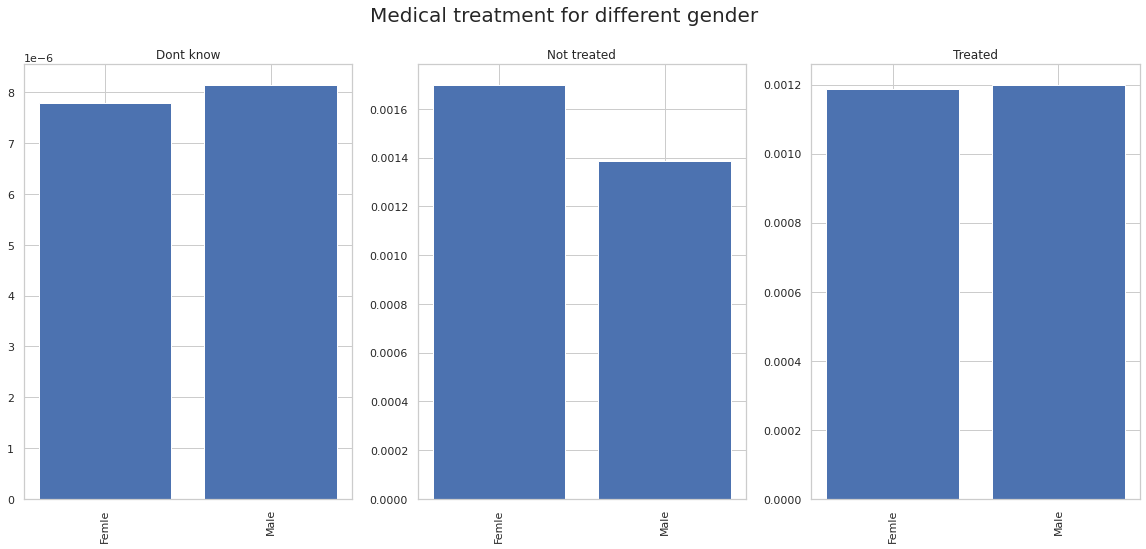

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Medical treatment for different gender', fontsize=20)
x = gender_index

plt.subplot(1, 3, 1)
plt.bar(x,Dont_know)
plt.gca().set_title('Dont know')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 2)
plt.bar(x,Not_Treated)
plt.gca().set_title('Not treated')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 3)
plt.bar(x,Treated)
plt.gca().set_title('Treated')
plt.xticks(rotation='vertical')

### **Race**

In [ ]:
g_normalize = race_group.unstack()

In [ ]:
race_offense_type_count = g_normalize.values.astype(float)
race_index = g_normalize.index
keys = list(population_race.keys())
values = list(population_race.values())
for i in range(len(race_index)):
  index = np.where(race_index == keys[i])
  race_offense_type_count[index[0][0]] = (race_offense_type_count[index[0][0]])/float(values[i])

In [ ]:
race_offense_type_count

array([[3.07134740e-05, 4.17703246e-03, 3.80847078e-03],
       [3.73798239e-06, 6.54146918e-04, 5.38269464e-04],
       [1.45363158e-05, 1.77666081e-03, 1.84611210e-03],
       [5.63337965e-05, 3.94336576e-03, 2.59135464e-03],
       [6.62583584e-06, 1.52543840e-03, 1.10993437e-03]])

In [ ]:
Dont_know = [item[0] for item in race_offense_type_count]
Not_Treated = [item[1] for item in race_offense_type_count]
Treated = [item[2] for item in race_offense_type_count]

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

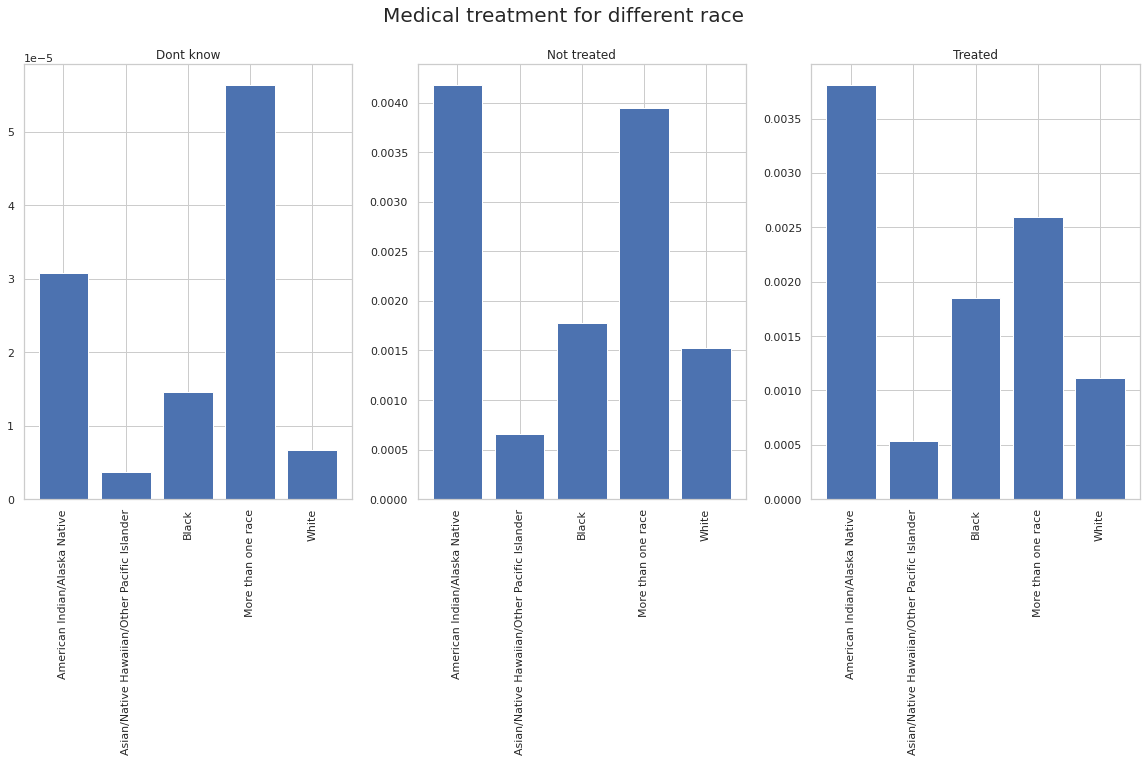

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Medical treatment for different race', fontsize=20)
x = race_index

plt.subplot(1, 3, 1)
plt.bar(x,Dont_know)
plt.gca().set_title('Dont know')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 2)
plt.bar(x,Not_Treated)
plt.gca().set_title('Not treated')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 3)
plt.bar(x,Treated)
plt.gca().set_title('Treated')
plt.xticks(rotation='vertical')

### **Hispanic origion**

In [ ]:
g_normalize = hispanic_group.unstack()

In [ ]:
hispanic_offense_type_count = g_normalize.values.astype(float)
hispanic_index = g_normalize.index
keys = list(population_hispanic_origin.keys())
values = list(population_hispanic_origin.values())
for i in range(len(hispanic_index)):
  index = np.where(hispanic_index == keys[i])
  hispanic_offense_type_count[index[0][0]] = (hispanic_offense_type_count[index[0][0]])/float(values[i])

In [ ]:
hispanic_offense_type_count

array([[1.11506339e-05, 1.54436280e-03, 1.29486736e-03],
       [7.53635374e-06, 1.54556357e-03, 1.17506013e-03],
       [           nan, 2.56760674e-03, 1.82217253e-03]])

In [ ]:
Dont_know = [item[0] for item in hispanic_offense_type_count]
Not_Treated = [item[1] for item in hispanic_offense_type_count]
Treated = [item[2] for item in hispanic_offense_type_count]

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

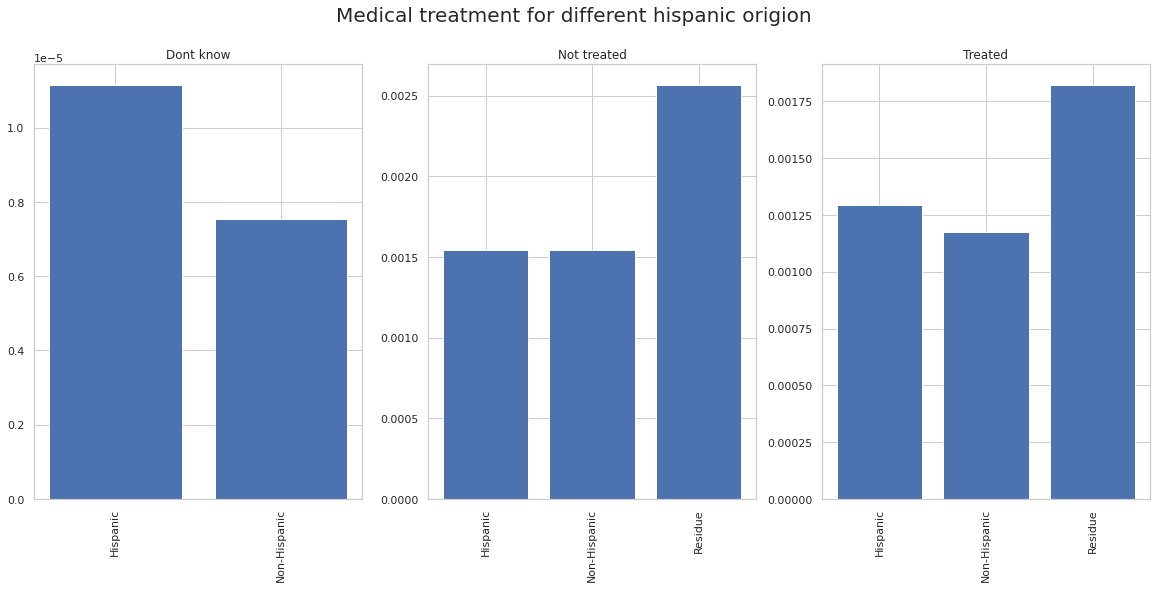

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Medical treatment for different hispanic origion', fontsize=20)
x = hispanic_index

plt.subplot(1, 3, 1)
plt.bar(x,Dont_know)
plt.gca().set_title('Dont know')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 2)
plt.bar(x,Not_Treated)
plt.gca().set_title('Not treated')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 3)
plt.bar(x,Treated)
plt.gca().set_title('Treated')
plt.xticks(rotation='vertical')

'\nthe ratios are similar as 50-50 from each category is treated and there is no bias for one over the other \n\nthe most treatrd in hispanic --> the non hispanic  --- the least -->  hispanic\nthe most trated in race --> white  --- least --> American/Indian \nthe most treated in gender --> female --- least --> male ,but they are around the same\nthe most treated in age range --> 35-49 --- least --> 65 or older\n\n'

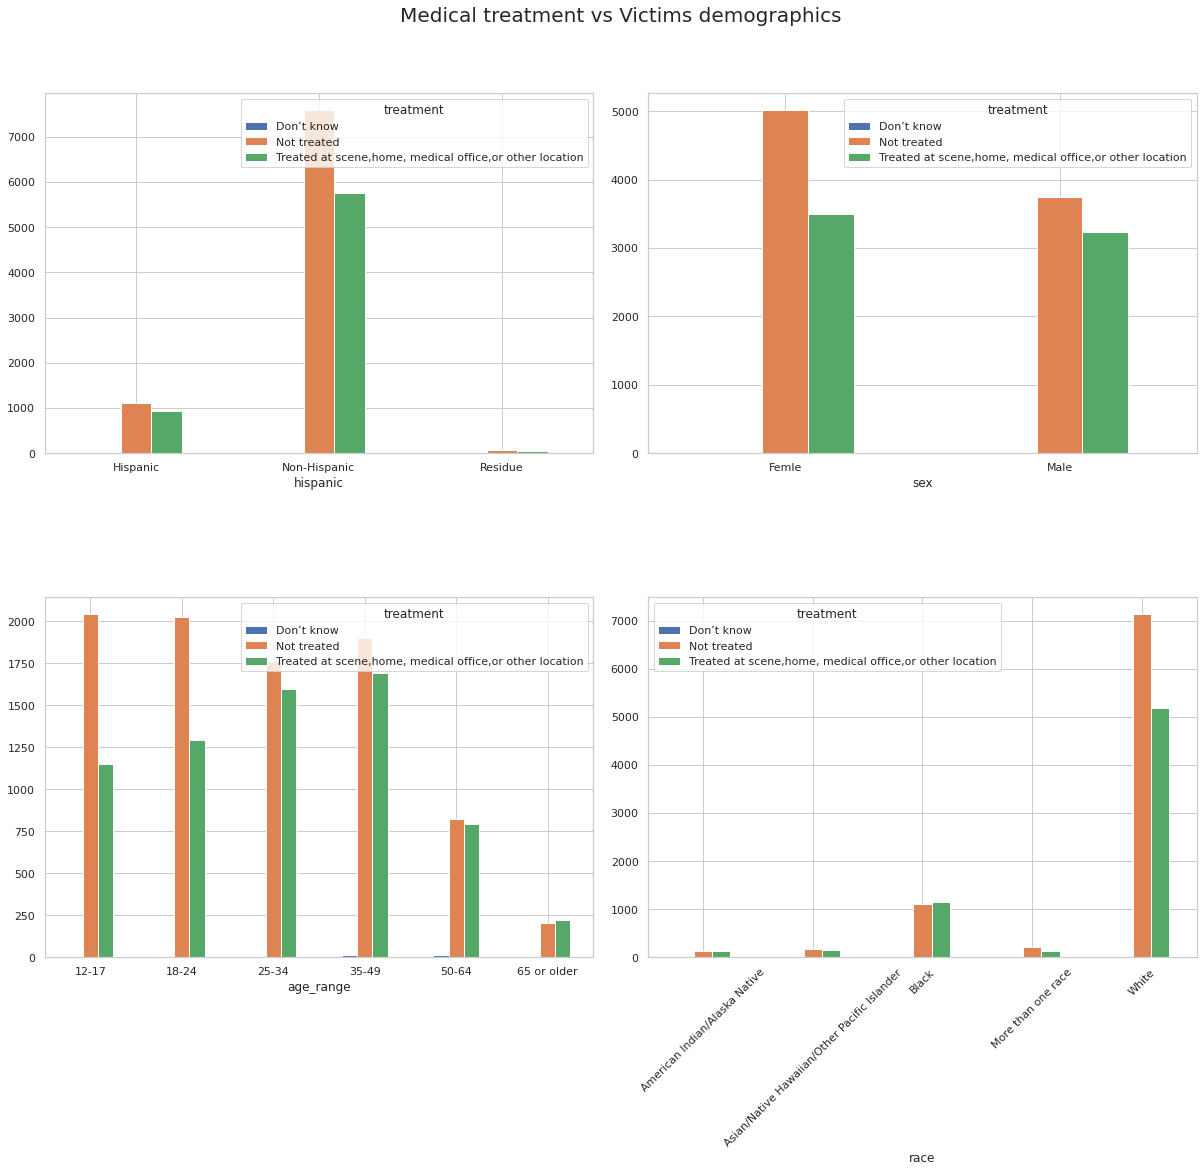

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20, 15))
fig.suptitle('Medical treatment vs Victims demographics', fontsize=20)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.4)
age_group.unstack().plot(kind='bar', legend=True,ax=axes[1,0],rot = 0)
gender_group.unstack().plot(kind='bar', legend=True,ax=axes[0,1],rot = 0)
race_group.unstack().plot(kind='bar', legend=True,ax=axes[1,1],rot = 45)
hispanic_group.unstack().plot(kind='bar', legend=True,ax=axes[0,0],rot = 0)

'''
the ratios are similar as 50-50 from each category is treated and there is no bias for one over the other 

the most treatrd in hispanic --> the non hispanic  --- the least -->  hispanic
the most trated in race --> white  --- least --> American/Indian 
the most treated in gender --> female --- least --> male ,but they are around the same
the most treated in age range --> 35-49 --- least --> 65 or older

'''

# **4. Which class of crimes is associated with the highest rate of same-offense-recidivism; i.e. prison re-entry for the same offense within 3 years of release?**

In [ ]:
Recidivism_interest.head()

,gender,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,dependents,education_level,prison_years,prison_offense,recidivism_within_3years,race,age_at_release,gang_affiliated,prior_conviction_episodes,prior_conviction_episodes_1,prior_conviction_episodes_2,prior_conviction_episodes_3,prior_conviction_episodes_4,prior_conviction_episodes_5,prior_conviction_episodes_6,prior_conviction_episodes_7,supervision_risk_score_first
0,M,False,False,False,3 or more,At least some college,More than 3 years,Drug,False,BLACK,43-47,False,3 or more,3,False,2,2 or more,False,False,False,3.0
1,M,False,False,True,1,Less than HS diploma,More than 3 years,Violent/Non-Sex,True,BLACK,33-37,False,3 or more,4 or more,True,0,2 or more,True,True,True,6.0
2,M,False,True,False,3 or more,At least some college,1-2 years,Drug,True,BLACK,48 or older,False,3 or more,2,True,1,2 or more,False,True,False,7.0
3,M,False,False,False,1,Less than HS diploma,1-2 years,Property,False,WHITE,38-42,False,3 or more,4 or more,False,3 or more,2 or more,False,False,False,7.0
4,M,True,False,False,3 or more,Less than HS diploma,1-2 years,Violent/Non-Sex,True,WHITE,33-37,False,1,0,True,0,1,False,False,False,4.0


In [ ]:
crime_recidivism = Recidivism_interest[['prison_offense','recidivism_within_3years']][(Recidivism_interest['recidivism_within_3years'] == True)] 

In [ ]:
crime_recidivism.head()

,prison_offense,recidivism_within_3years
1,Violent/Non-Sex,True
2,Drug,True
4,Violent/Non-Sex,True
6,Property,True
8,Drug,True


In [ ]:
crime_group = crime_recidivism.groupby(['prison_offense'])["recidivism_within_3years"].count()

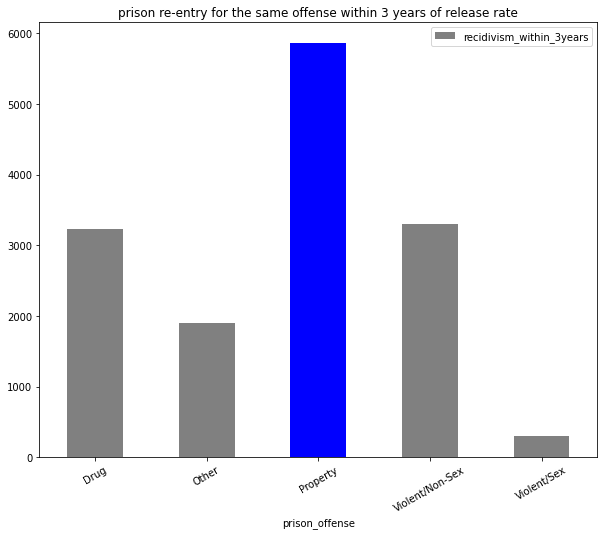

In [ ]:
crime_group.plot(kind='bar', legend=True,figsize=(10, 8),rot = 30,color = ['grey','grey','blue','grey','grey'],title='prison re-entry for the same offense within 3 years of release rate')

# **5. Are prisoners who are younger at the time of release more or less likely to reoffend than those who are older?**

In [ ]:
age_release_recidivism = Recidivism_interest[['age_at_release','recidivism_within_3years']]

In [ ]:
age_release_group = age_release_recidivism.groupby(['age_at_release','recidivism_within_3years'])["recidivism_within_3years"].count()

Text(0.5, 1.0, 'the prisoners counts in each age range')

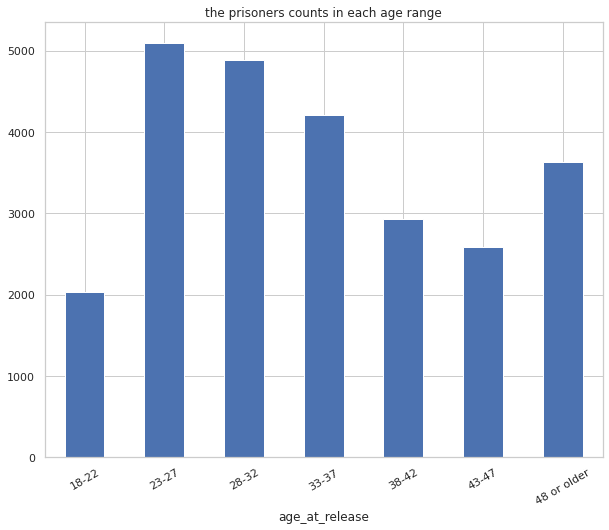

In [ ]:
age_release_group_count = age_release_recidivism.groupby(['age_at_release'])["recidivism_within_3years"].count()
age_release_group_count.plot(kind='bar', legend=False,figsize=(10, 8),title='Prison re-entry for different ages',rot = 30)
plt.title("the prisoners counts in each age range")

In [ ]:
age_recidivism = age_release_group.unstack()

In [ ]:
x = age_recidivism.index
y = age_recidivism.values.astype(float)
for i in range(len(x)):
  y[i] = y[i]/y[i].sum()

In [ ]:
Not_recidivism = [item[0] for item in y]
recidivism = [item[1] for item in y]

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

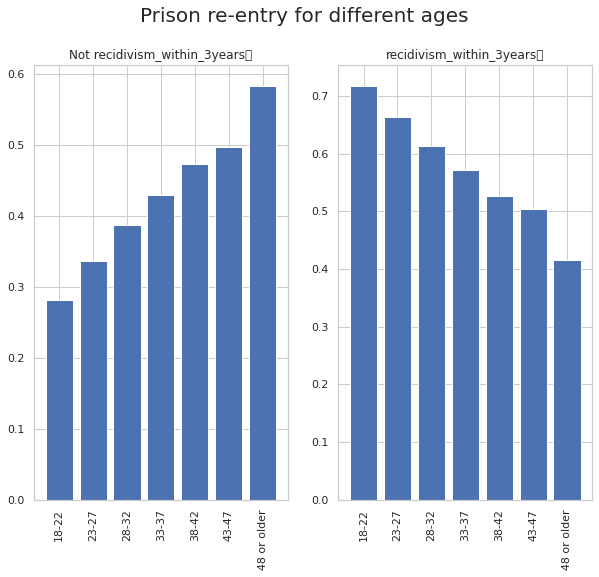

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('Prison re-entry for different ages', fontsize=20)

plt.subplot(1, 2, 1)
plt.bar(x,Not_recidivism)
plt.gca().set_title('Not recidivism_within_3years	')
plt.xticks(rotation='vertical')

plt.subplot(1, 2, 2)
plt.bar(x,recidivism)
plt.gca().set_title('recidivism_within_3years	')
plt.xticks(rotation='vertical')

# **PART 4: Hypothesis Testing:**

### Preparing the data to study the claims

In [34]:
Firearm_Laws_copy.head()

,state,year,lawtotal
0,Alabama,1991,15
1,Alabama,1992,16
2,Alabama,1993,16
3,Alabama,1994,16
4,Alabama,1995,16


In [35]:
offenseCount.head()

,stateName,offenseName,offenseCount,Year
0,Hawaii,assisting-or-promoting-prostitution,13,2018
1,Hawaii,assisting-or-promoting-prostitution,7,2019
2,Hawaii,assisting-or-promoting-prostitution,2,2021
3,Hawaii,all-other-larceny,8680,2018
4,Hawaii,all-other-larceny,8609,2019


In [36]:
all_violent_crime = ['assault-offenses','homicide-offenses', 'robbery','kidnapping-abduction','sexual-assult-with-an-object' ]
all_non_violent_crime = [x for x in offenses if x not in all_violent_crime]

off_copy = offenseCount.copy()
off_copy.replace(all_non_violent_crime,'non_violent_crime' , inplace = True)
off_copy.replace(all_violent_crime,'violent_crime' , inplace = True)
off_copy.rename(columns = {'Year':'year'}, inplace = True)
off_copy.rename(columns = {'stateName':'state'}, inplace = True)

off_copy

,state,offenseName,offenseCount,year
0,Hawaii,non_violent_crime,13,2018
1,Hawaii,non_violent_crime,7,2019
2,Hawaii,non_violent_crime,2,2021
3,Hawaii,non_violent_crime,8680,2018
4,Hawaii,non_violent_crime,8609,2019
...,...,...,...,...
105161,District of Columbia,non_violent_crime,1,2009
105163,District of Columbia,non_violent_crime,3,2013
105164,District of Columbia,non_violent_crime,2,2008
105165,District of Columbia,non_violent_crime,2,2010


In [37]:
merged_df = pd.merge(Firearm_Laws_copy, off_copy, on=['state','year'])

In [38]:
merged_df.shape

(93431, 5)

In [39]:
merged_df.head()

,state,year,lawtotal,offenseName,offenseCount
0,Alabama,1991,15,non_violent_crime,31474
1,Alabama,1991,15,non_violent_crime,55713
2,Alabama,1991,15,non_violent_crime,163
3,Alabama,1991,15,non_violent_crime,40
4,Alabama,1991,15,non_violent_crime,21


## Specify the group of violent crimes only

In [40]:
merged_off_df = merged_df.groupby(by=['offenseName'])
violent_df = merged_off_df.get_group('violent_crime')
display(violent_df)

,state,year,lawtotal,offenseName,offenseCount
20,Alabama,1991,15,violent_crime,328
29,Alabama,1991,15,violent_crime,9315
82,Alabama,1991,15,violent_crime,31474
83,Alabama,1991,15,violent_crime,678
84,Alabama,1991,15,violent_crime,37978
...,...,...,...,...,...
93359,Wyoming,2020,7,violent_crime,6
93405,Wyoming,2020,7,violent_crime,111
93406,Wyoming,2020,7,violent_crime,140
93407,Wyoming,2020,7,violent_crime,833


In [41]:
violent_df.drop(columns= ["offenseName",'state','year'], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
violent_df

,lawtotal,offenseCount
20,15,328
29,15,9315
82,15,31474
83,15,678
84,15,37978
...,...,...
93359,7,6
93405,7,111
93406,7,140
93407,7,833


In [43]:
law_group = violent_df.groupby(['lawtotal']).mean() 
display(law_group.head())

,offenseCount
lawtotal,
1,1753.740741
2,2202.534653
3,392.766467
4,1939.632000
5,1351.459596


In [44]:
law_off_dict = dict(law_group['offenseCount'])


## H0: "U.S. states that implement stricter firearm control laws, have the same or larger violent crime rates on average"
## Ha: “U.S. states that implement stricter firearm control laws, have lower violent crime rates on average”


In [45]:
from scipy.stats import spearmanr
number_of_laws=list(law_off_dict.keys())
avg_crime=list(law_off_dict.values())

hyp1=spearmanr(number_of_laws,avg_crime ,alternative='less')
print("Correlation=",round(hyp1[0],3),", p-value=",round(hyp1[1],3),sep="")

Correlation=-0.18, p-value=0.073


From the results we found that p-value=0.0727 >0.05 hence we cannot reject the
null-hypothesis. Moreover, the correlation value itself is weak=-0.18 
and the scatter plot emphasises this weak correlation

Hence we cannot reject the null-hypothesis i.e the claim in invalid.

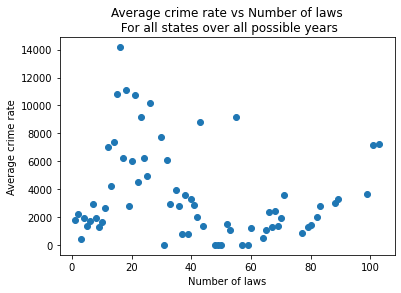

In [46]:
plt.scatter(number_of_laws,avg_crime)
plt.xlabel("Number of laws")
plt.ylabel("Average crime rate")
plt.title("Average crime rate vs Number of laws\n For all states over all possible years")
plt.show()

### Since we found no correlation between the no. of laws and crime rate, perhaps there is some confounding variable prevented their correlation (if exists) to disappear.
### Hence we will explore one variable which is the crime rates per year to see if it is nearly constant across all years (then it has no effect of the previous claim).


## H0: "U.S. states encounter the same or decreasing crime rates on average over all the years of the study regardless of how strict is the applied laws"
## Ha: "U.S. states encounter an increasing crime rates on average over all the years of the study regardless of how strict is the applied laws"


In [47]:
violent_df2 = merged_off_df.get_group('violent_crime')
violent_df2.drop(columns= ["offenseName",'state','lawtotal'], inplace = True)
display(violent_df2)
year_group = violent_df2.groupby(['year']).mean() 
year_off_dict = dict(year_group['offenseCount'])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year,offenseCount
20,1991,328
29,1991,9315
82,1991,31474
83,1991,678
84,1991,37978
...,...,...
93359,2020,6
93405,2020,111
93406,2020,140
93407,2020,833


In [48]:
from scipy.stats import spearmanr
years=list(year_off_dict.keys())
avg_crime2=list(year_off_dict.values())

hyp2=spearmanr(years,avg_crime2 ,alternative='greater')
print("Correlation=",round(hyp2[0],3),", p-value=",round(hyp2[1],3),sep="")

Correlation=0.361, p-value=0.025


From the results we found that p-value=0.025 < 0.05, hence we can safely reject the null-hypothesis. We can colnclude that perhaps this increase or crime rates over time is the reason why the crime rates does not decline even when appplying more strict laws.

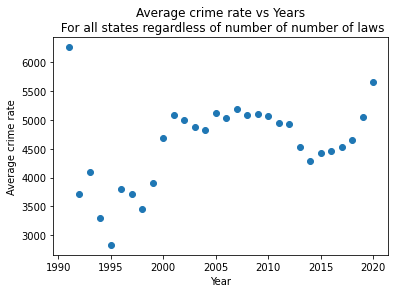

In [49]:
plt.scatter(years,avg_crime2)
plt.xlabel("Year")
plt.ylabel("Average crime rate")
plt.title("Average crime rate vs Years\n For all states regardless of number of number of laws")
plt.show()

# **PART 5: Regression Analysis:**

In [ ]:
# Offender’s supervision risk score based on :
# - All prior convictions.
# - Offender’s race.
# - Offender’s gang affiliation.
# - Offender’s age at release.

Recidivism_interest_copy = Recidivism_interest.copy()
interest_features = ['supervision_risk_score_first', 'race','age_at_release', 'gang_affiliated' ,'prior_conviction_episodes','prior_conviction_episodes_1','prior_conviction_episodes_2','prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7']
Recidivism_interest_copy = Recidivism_interest_copy[interest_features]
Recidivism_interest_copy['intercept'] = 1
Recidivism_interest_copy.head()

,supervision_risk_score_first,race,age_at_release,gang_affiliated,prior_conviction_episodes,prior_conviction_episodes_1,prior_conviction_episodes_2,prior_conviction_episodes_3,prior_conviction_episodes_4,prior_conviction_episodes_5,prior_conviction_episodes_6,prior_conviction_episodes_7,intercept
0,3.0,BLACK,43-47,False,3 or more,3,False,2,2 or more,False,False,False,1
1,6.0,BLACK,33-37,False,3 or more,4 or more,True,0,2 or more,True,True,True,1
2,7.0,BLACK,48 or older,False,3 or more,2,True,1,2 or more,False,True,False,1
3,7.0,WHITE,38-42,False,3 or more,4 or more,False,3 or more,2 or more,False,False,False,1
4,4.0,WHITE,33-37,False,1,0,True,0,1,False,False,False,1


**One Hot encoding for categorical features to fit stats model**

In [ ]:
# transform the categorical variable 
# Get one hot encoding of columns 'race'
one_hot = pd.get_dummies(Recidivism_interest_copy['race'],prefix='race' )
# Drop column as it is now encoded
df_reg = Recidivism_interest_copy.drop('race',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy 'race_race_WHITE'
col_baseline_dummy = df_reg['race_WHITE']
df_reg= df_reg.drop(columns= ['race_WHITE'])

one_hot = pd.get_dummies(df_reg['age_at_release'],prefix='age_at_release' )
# Drop column as it is now encoded
df_reg = df_reg.drop('age_at_release',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy '48 or older'
col_baseline_dummy = df_reg['age_at_release_48 or older']
df_reg= df_reg.drop(columns= ['age_at_release_48 or older'])

one_hot = pd.get_dummies(df_reg['gang_affiliated'],prefix='gang_affiliated' )
# Drop column as it is now encoded
df_reg = df_reg.drop('gang_affiliated',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy 'True'
col_baseline_dummy = df_reg['gang_affiliated_True']
df_reg= df_reg.drop(columns= ['gang_affiliated_True'])

one_hot = pd.get_dummies(df_reg['prior_conviction_episodes_2'],prefix='prior_conviction_episodes_2' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes_2',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_2_True']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_2_True'])

one_hot = pd.get_dummies(df_reg['prior_conviction_episodes_5'],prefix='prior_conviction_episodes_5' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes_5',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_5_True']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_5_True'])

one_hot = pd.get_dummies(df_reg['prior_conviction_episodes_6'],prefix='prior_conviction_episodes_6' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes_6',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_6_True']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_6_True'])

one_hot = pd.get_dummies(df_reg['prior_conviction_episodes_7'],prefix='prior_conviction_episodes_7' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes_7',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_7_True']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_7_True'])


one_hot = pd.get_dummies(df_reg['prior_conviction_episodes_4'],prefix='prior_conviction_episodes_4' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes_4',axis = 1)
# Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_4_2 or more']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_4_2 or more'])

one_hot = pd.get_dummies(df_reg['prior_conviction_episodes_3'],prefix='prior_conviction_episodes_3' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes_3',axis = 1)
# # Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# # drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_3_3 or more']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_3_3 or more'])

one_hot = pd.get_dummies(df_reg['prior_conviction_episodes_1'],prefix='prior_conviction_episodes_1' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes_1',axis = 1)
# # Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# # drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_1_4 or more']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_1_4 or more'])

one_hot = pd.get_dummies(df_reg['prior_conviction_episodes'],prefix='prior_conviction_episodes' )
# Drop column as it is now encoded
df_reg = df_reg.drop('prior_conviction_episodes',axis = 1)
# # Join the encoded df_reg
df_reg = df_reg.join(one_hot)
# # drop the baseline dummy 'True'
col_baseline_dummy = df_reg['prior_conviction_episodes_3 or more']
df_reg= df_reg.drop(columns= ['prior_conviction_episodes_3 or more'])

In [ ]:
df_reg.head().T

,0,1,2,3,4
supervision_risk_score_first,3.0,6.0,7.0,7.0,4.0
intercept,1.0,1.0,1.0,1.0,1.0
race_BLACK,1.0,1.0,1.0,0.0,0.0
age_at_release_18-22,0.0,0.0,0.0,0.0,0.0
age_at_release_23-27,0.0,0.0,0.0,0.0,0.0
age_at_release_28-32,0.0,0.0,0.0,0.0,0.0
age_at_release_33-37,0.0,1.0,0.0,0.0,1.0
age_at_release_38-42,0.0,0.0,0.0,1.0,0.0
age_at_release_43-47,1.0,0.0,0.0,0.0,0.0
gang_affiliated_False,1.0,1.0,1.0,1.0,1.0


In [ ]:
#with out scaling the data
import statsmodels.api as sm
x = df_reg.drop(columns = ['supervision_risk_score_first'])
y = df_reg['supervision_risk_score_first']
lm = sm.OLS(y.astype(float) , x.astype(float))
results = lm.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     supervision_risk_score_first   R-squared:                       0.311
Model:                                      OLS   Adj. R-squared:                  0.311
Method:                           Least Squares   F-statistic:                     477.1
Date:                          Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                                  20:26:31   Log-Likelihood:                -53260.
No. Observations:                         25360   AIC:                         1.066e+05
Df Residuals:                             25335   BIC:                         1.068e+05
Df Model:                                    24                                         
Covariance Type:                      nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------

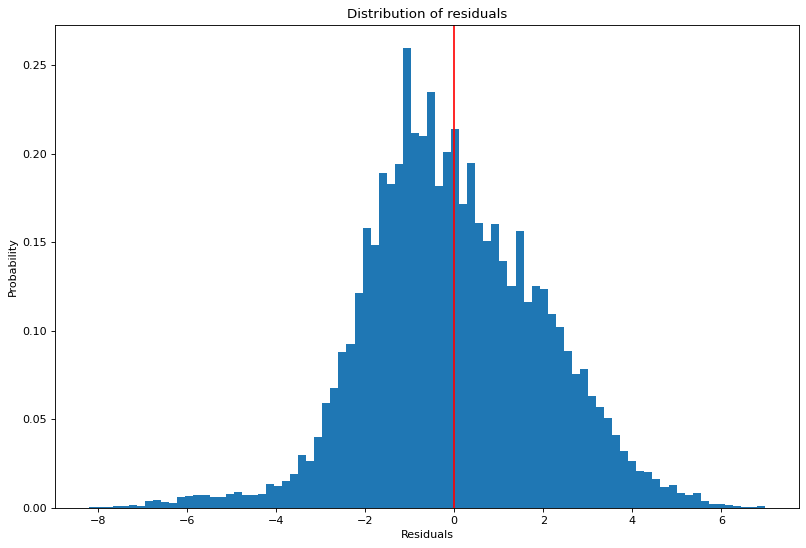

In [ ]:

plt.figure(figsize=(12, 8), dpi=80)
res = results.resid
plt.hist(res, bins='fd', density=True)
plt.title('Distribution of residuals')
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.axvline(x=np.mean(res), color='red')


plt.show()

In [ ]:
# the mean and variance of the residuals
res.mean(), res.var()

(2.7256150368589334e-15, 3.906005996822989)

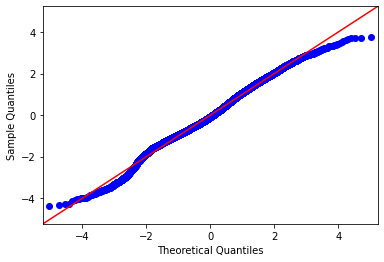

In [ ]:
#check if it is normally distributed
import scipy.stats as stats
res = results.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

Text(0, 0.5, 'Residuals')

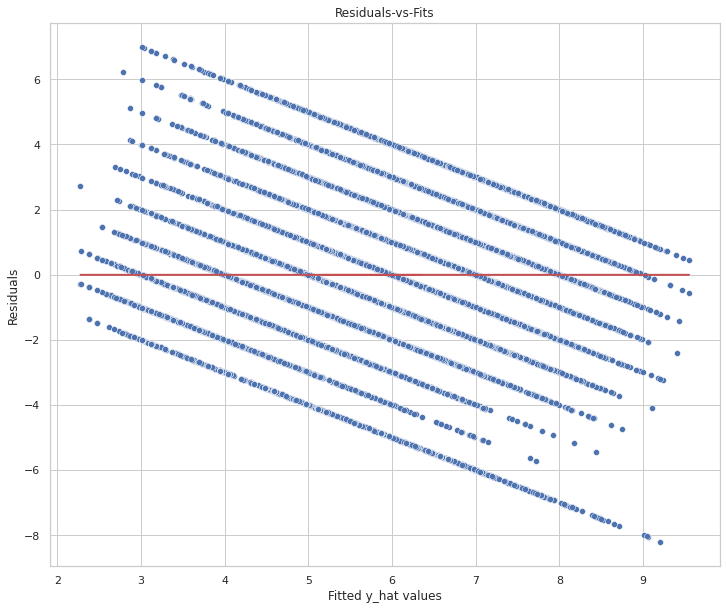

In [ ]:
#risidual distribution against fits
sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
y_hat_fits = results.predict(x)
residuals = results.resid
sns.scatterplot(x=y_hat_fits,\
                    y=residuals)
plt.plot(y_hat_fits, np.zeros_like(results.resid), color='r')

plt.title('Residuals-vs-Fits')

plt.xlabel('Fitted y_hat values')

plt.ylabel('Residuals')


(0.0, 1000.0)

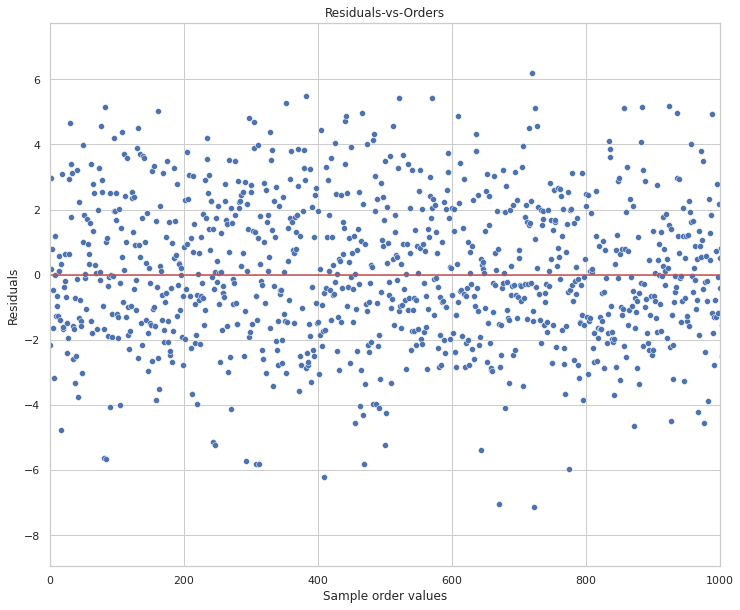

In [ ]:
#risidual distribution against orders


#sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
sample_orders = x.index.values
residuals = results.resid
sns.scatterplot(x=sample_orders,\
                    y=residuals)
plt.plot(sample_orders, np.zeros_like(results.resid), color='r')

plt.title('Residuals-vs-Orders')

plt.xlabel('Sample order values')

plt.ylabel('Residuals')
plt.xlim([0, 1000])

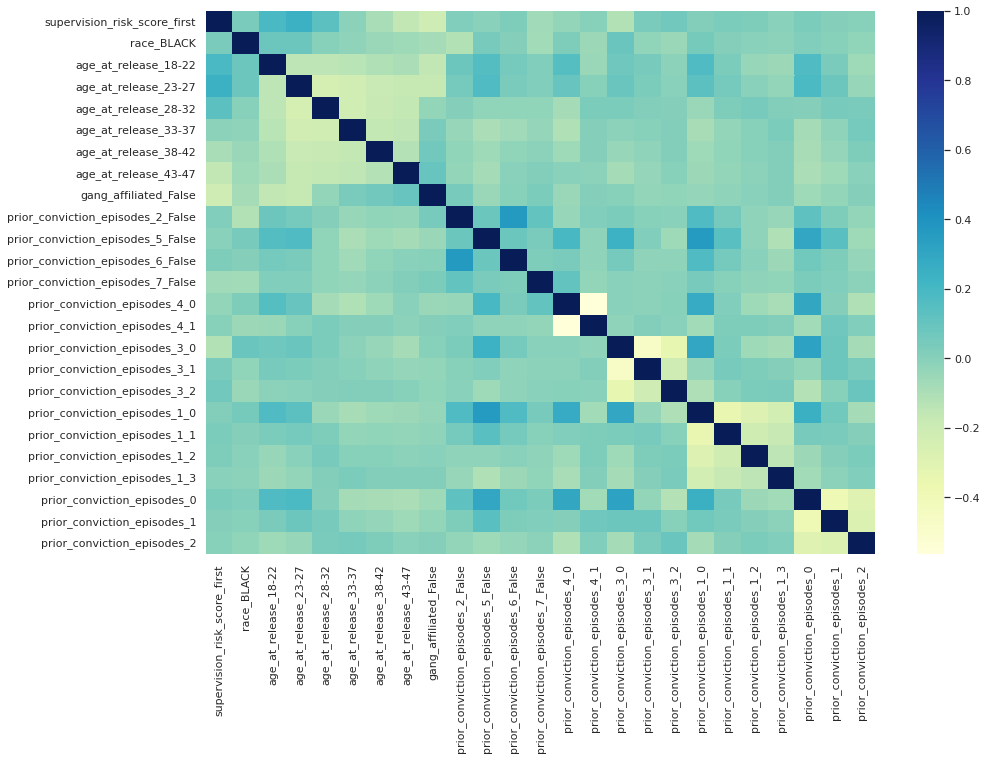

In [ ]:
plt.figure(figsize=(15,10))
data = df_reg.drop(columns = ['intercept'])
sns.heatmap(data.corr(),cmap="YlGnBu")

## fit the model

In [ ]:
Recidivism_interest_copy = Recidivism_interest_copy_num.copy()
Recidivism_interest_copy.shape

(25360, 21)

In [ ]:
#with out scaling the data
import statsmodels.api as sm

Recidivism_interest_copy = Recidivism_interest_copy_num.copy()
Recidivism_interest_copy['intercept'] = 1
interest_features = ['intercept', 'race','age_at_release', 'gang_affiliated' ,'prior_conviction_episodes','prior_conviction_episodes_1','prior_conviction_episodes_2','prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7']
ecidivism_interest_copy = Recidivism_interest_copy[interest_features]

lm = sm.OLS(Recidivism_interest_copy['supervision_risk_score_first'].astype(float) , Recidivism_interest_copy[interest_features].astype(float))
results = lm.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     supervision_risk_score_first   R-squared:                       0.309
Model:                                      OLS   Adj. R-squared:                  0.309
Method:                           Least Squares   F-statistic:                     1031.
Date:                          Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                                  20:26:34   Log-Likelihood:                -53300.
No. Observations:                         25360   AIC:                         1.066e+05
Df Residuals:                             25348   BIC:                         1.067e+05
Df Model:                                    11                                         
Covariance Type:                      nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------

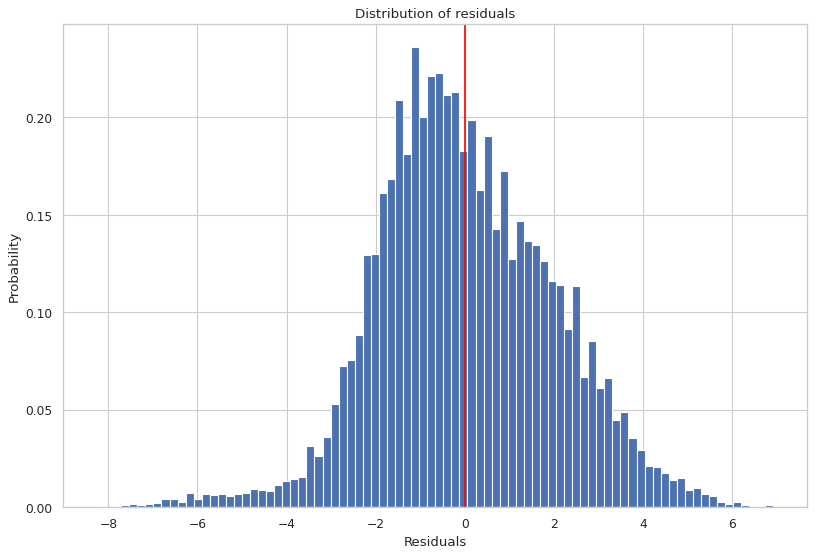

In [ ]:

plt.figure(figsize=(12, 8), dpi=80)
res = results.resid
plt.hist(res, bins='fd', density=True)
plt.title('Distribution of residuals')
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.axvline(x=np.mean(res), color='red')


plt.show()

In [ ]:
# the mean and variance of the residuals
res.mean(), res.var()

(-6.536096585099218e-15, 3.918183085709512)

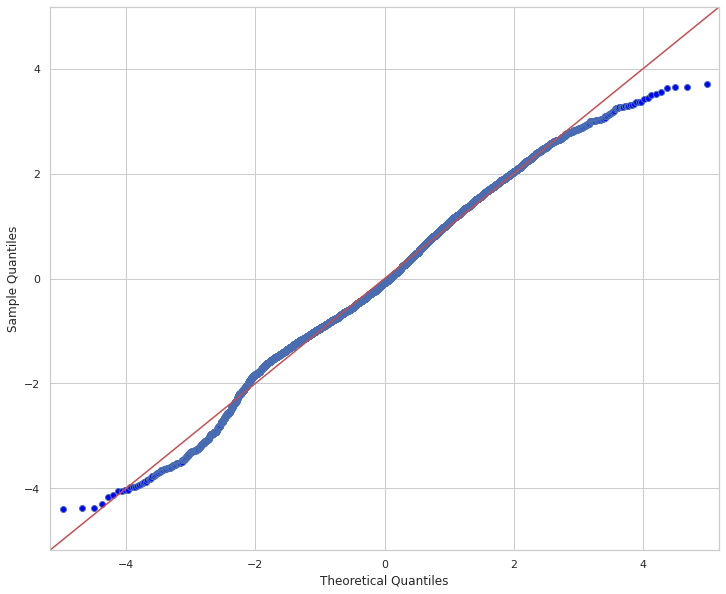

In [ ]:
#check if it is normally distributed
import scipy.stats as stats
res = results.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

Text(0, 0.5, 'Residuals')

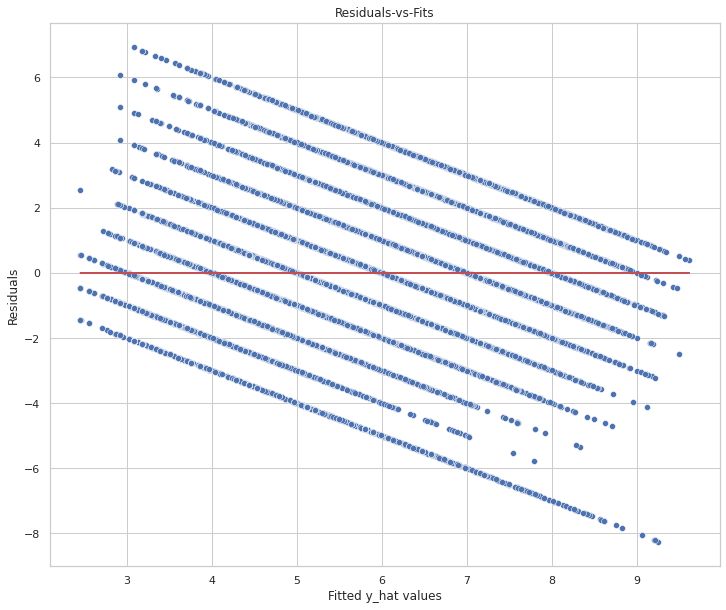

In [ ]:
#risidual distribution against fits
sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
y_hat_fits = results.predict(Recidivism_interest_copy[interest_features])
residuals = results.resid
sns.scatterplot(x=y_hat_fits,\
                    y=residuals)
plt.plot(y_hat_fits, np.zeros_like(results.resid), color='r')

plt.title('Residuals-vs-Fits')

plt.xlabel('Fitted y_hat values')

plt.ylabel('Residuals')


(0.0, 1000.0)

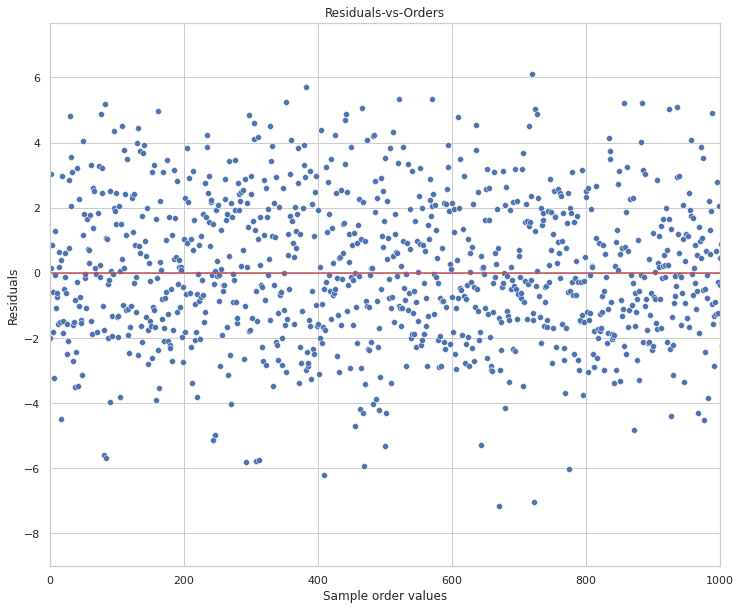

In [ ]:
#risidual distribution against orders


#sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
sample_orders = Recidivism_interest_copy[interest_features].index.values
residuals = results.resid
sns.scatterplot(x=sample_orders,\
                    y=residuals)
plt.plot(sample_orders, np.zeros_like(results.resid), color='r')

plt.title('Residuals-vs-Orders')

plt.xlabel('Sample order values')

plt.ylabel('Residuals')

plt.xlim([0, 1000])

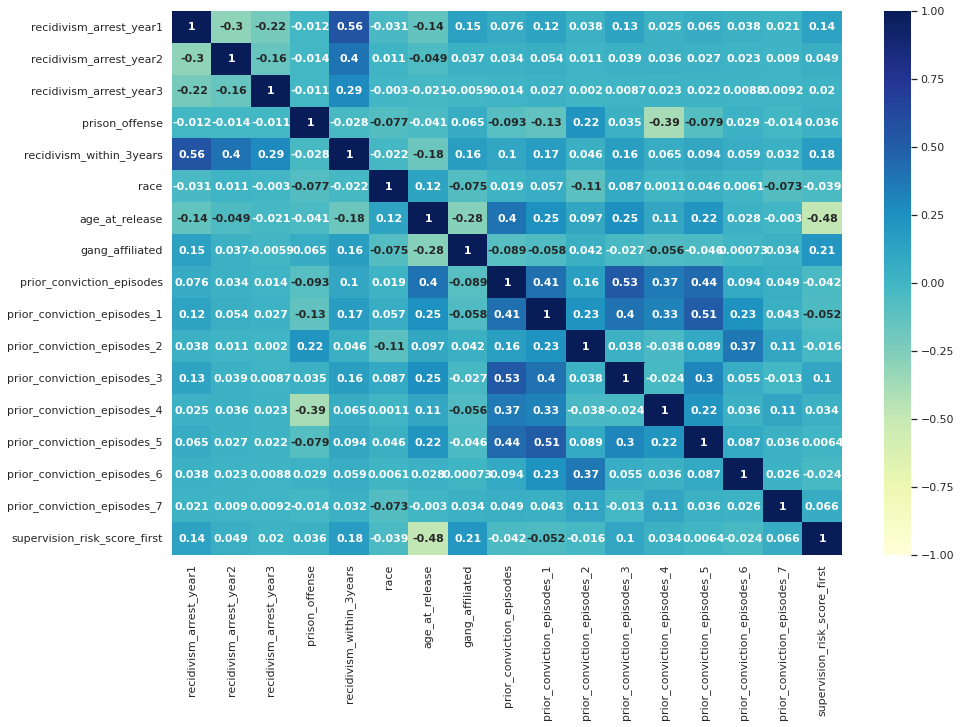

In [ ]:
#check the correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(Recidivism_interest_copy_num.corr(),cmap="YlGnBu", vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'})

In [ ]:
#with scaling the data
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
all_features = ['supervision_risk_score_first','intercept', 'race','age_at_release', 'gang_affiliated' ,'prior_conviction_episodes','prior_conviction_episodes_1','prior_conviction_episodes_2','prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7']

scaled = scaler.fit_transform(Recidivism_interest_copy[all_features])
scaled_df = pd.DataFrame(scaled,columns= Recidivism_interest_copy[all_features].columns)

X_features = ['intercept', 'race','age_at_release', 'gang_affiliated' ,'prior_conviction_episodes','prior_conviction_episodes_1','prior_conviction_episodes_2','prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7']

lm = sm.OLS(scaled_df['supervision_risk_score_first'].astype(float) , scaled_df[X_features].astype(float))
results = lm.fit()
print(results.summary())

                                      OLS Regression Results                                     
Dep. Variable:     supervision_risk_score_first   R-squared (uncentered):                   0.681
Model:                                      OLS   Adj. R-squared (uncentered):              0.681
Method:                           Least Squares   F-statistic:                              4925.
Date:                          Sun, 08 Jan 2023   Prob (F-statistic):                        0.00
Time:                                  20:26:38   Log-Likelihood:                         -9510.8
No. Observations:                         25360   AIC:                                  1.904e+04
Df Residuals:                             25349   BIC:                                  1.913e+04
Df Model:                                    11                                                  
Covariance Type:                      nonrobust                                                  
                    

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


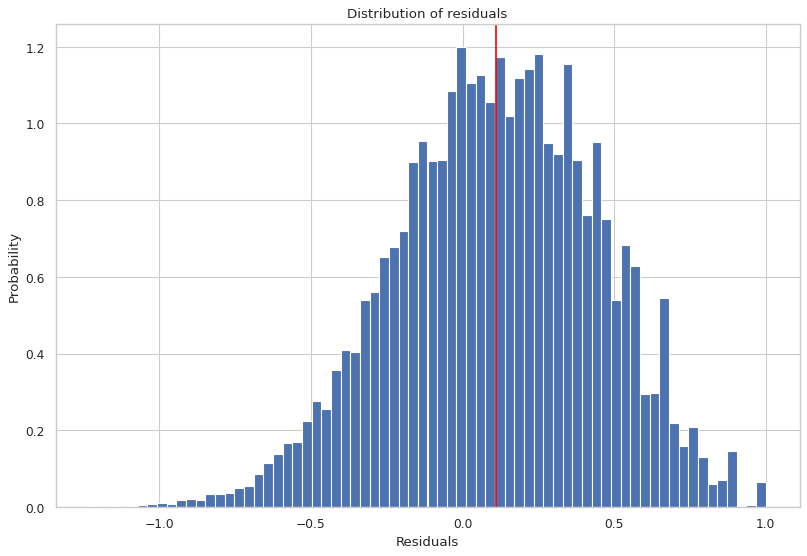

In [ ]:

plt.figure(figsize=(12, 8), dpi=80)
res = results.resid
plt.hist(res, bins='fd', density=True)
plt.title('Distribution of residuals')
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.axvline(x=np.mean(res), color='red')


plt.show()

In [ ]:
# the mean and variance of the residuals
res.mean(), res.var()

(0.11049491339531833, 0.11175345088508362)

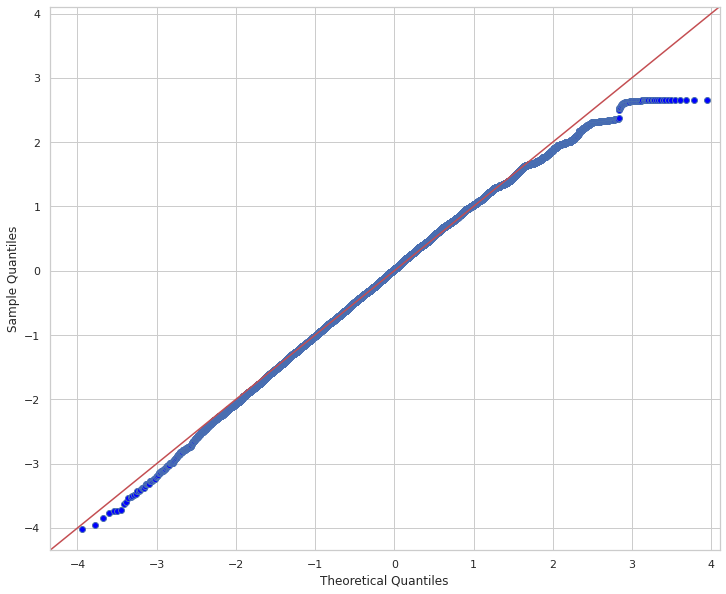

In [ ]:
#check if it is normally distributed
import scipy.stats as stats
res = results.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

Text(0, 0.5, 'Residuals')

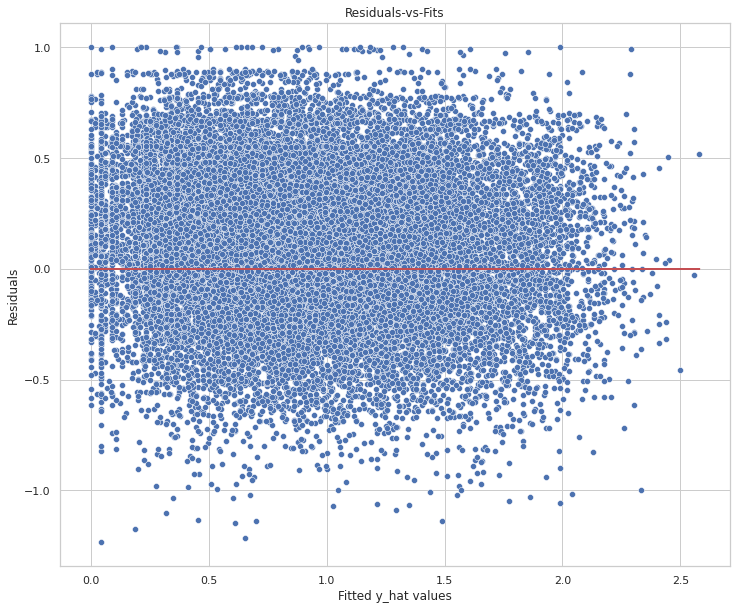

In [ ]:
#risidual distribution against fits
sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
y_hat_fits = results.predict(Recidivism_interest_copy[X_features])
residuals = results.resid
sns.scatterplot(x=y_hat_fits,\
                    y=residuals)
plt.plot(y_hat_fits, np.zeros_like(results.resid), color='r')

plt.title('Residuals-vs-Fits')

plt.xlabel('Fitted y_hat values')

plt.ylabel('Residuals')


(0.0, 1000.0)

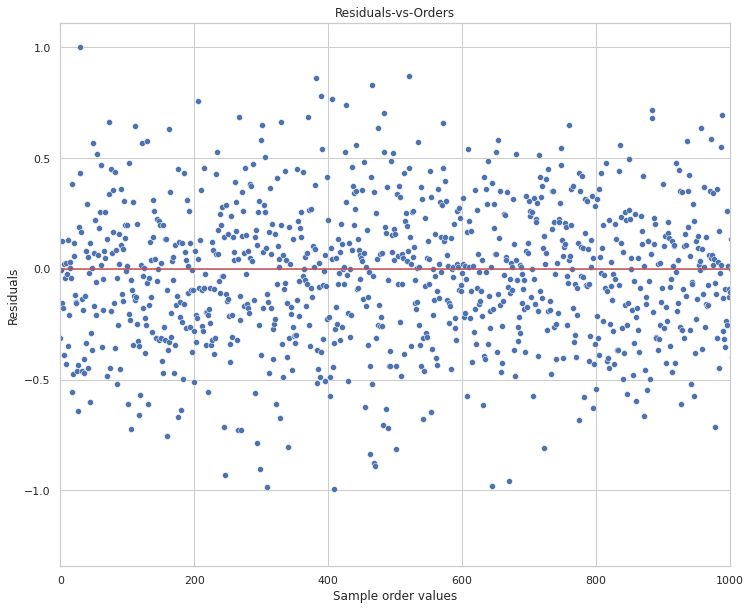

In [ ]:
#risidual distribution against orders


#sns.set(rc={'figure.figsize':(12,10)}, style='whitegrid')
sample_orders = Recidivism_interest_copy[X_features].index.values
residuals = results.resid
sns.scatterplot(x=sample_orders,\
                    y=residuals)
plt.plot(sample_orders, np.zeros_like(results.resid), color='r')

plt.title('Residuals-vs-Orders')

plt.xlabel('Sample order values')

plt.ylabel('Residuals')
plt.xlim([0, 1000])


# **PART 6: Bonus Task:**

In [ ]:
from sklearn import datasets, model_selection, preprocessing 
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder 
from sklearn.neural_network import MLPClassifier


In [ ]:
Recidivism['recidivism_arrest_year1'].value_counts(), Recidivism['recidivism_arrest_year2'].value_counts(), Recidivism['recidivism_arrest_year3'].value_counts()


(False    18111
 True      7724
 Name: recidivism_arrest_year1, dtype: int64, False    21268
 True      4567
 Name: recidivism_arrest_year2, dtype: int64, False    23222
 True      2613
 Name: recidivism_arrest_year3, dtype: int64)

In [ ]:
# likelihood of recidivism within 3 years of release based on the state of Georgia recidivism records.
#from Q4,Q5 Part 3 the related features to the recidivism within 3 years of release could depend on 

# starting with these features gives accurace of about 90
# interest = ['gender','recidivism_arrest_year1','recidivism_arrest_year2','dependents','education_level','prison_years','prison_offense','recidivism_within_3years','race', 'age_at_release', 'gang_affiliated' ,'supervision_risk_score_first']

# we tried to neglect features to know the most effective feature,they gave the same accuracy 90%
# interest = ['gender','recidivism_arrest_year1','recidivism_arrest_year2','dependents','education_level','prison_offense','recidivism_within_3years']
# interest = ['gender','dependents','education_level','prison_years','prison_offense','recidivism_within_3years','race', 'age_at_release', 'gang_affiliated' ,'supervision_risk_score_first']
# interest = ['program_attendances','violations_instruction','gender','dependents','education_level','prison_years','prison_offense','recidivism_within_3years','race', 'age_at_release', 'gang_affiliated' ,'prior_conviction_episodes','prior_conviction_episodes_1','prior_conviction_episodes_2','prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7','supervision_risk_score_first']
interest = ['employment_exempt','prior_arrest_episodes_drug','prior_arrest_episodes_violent','prior_arrest_episodes_misd','program_attendances','violations_instruction','gender','dependents','education_level','prison_years','prison_offense','recidivism_within_3years','race', 'age_at_release', 'gang_affiliated' ,'prior_conviction_episodes','prior_conviction_episodes_1','prior_conviction_episodes_2','prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7','supervision_risk_score_first']

Recidivism_interest_tr = Recidivism_interest.copy()
Recidivism_interest_tr = Recidivism_interest_tr[interest]
X = Recidivism_interest_tr.drop(columns= ['recidivism_within_3years'])


In [ ]:
X.head()

,employment_exempt,prior_arrest_episodes_drug,prior_arrest_episodes_violent,prior_arrest_episodes_misd,program_attendances,violations_instruction,gender,dependents,education_level,prison_years,prison_offense,race,age_at_release,gang_affiliated,prior_conviction_episodes,prior_conviction_episodes_1,prior_conviction_episodes_2,prior_conviction_episodes_3,prior_conviction_episodes_4,prior_conviction_episodes_5,prior_conviction_episodes_6,prior_conviction_episodes_7,supervision_risk_score_first
0,False,3,1,6 or more,6,False,M,3 or more,At least some college,More than 3 years,Drug,BLACK,43-47,False,3 or more,3,False,2,2 or more,False,False,False,3.0
1,False,3,3 or more,6 or more,0,True,M,1,Less than HS diploma,More than 3 years,Violent/Non-Sex,BLACK,33-37,False,3 or more,4 or more,True,0,2 or more,True,True,True,6.0
2,False,2,3 or more,6 or more,6,True,M,3 or more,At least some college,1-2 years,Drug,BLACK,48 or older,False,3 or more,2,True,1,2 or more,False,True,False,7.0
3,False,3,0,6 or more,6,False,M,1,Less than HS diploma,1-2 years,Property,WHITE,38-42,False,3 or more,4 or more,False,3 or more,2 or more,False,False,False,7.0
4,False,1,3 or more,4,7,False,M,3 or more,Less than HS diploma,1-2 years,Violent/Non-Sex,WHITE,33-37,False,1,0,True,0,1,False,False,False,4.0


In [ ]:
Recidivism_interest_tr.shape

(25360, 24)

In [ ]:

x_train , x_test , y_train , y_test = model_selection.train_test_split(X,Recidivism_interest_tr['recidivism_within_3years'],test_size = 0.2 , random_state=42 , shuffle = True)

enc = OneHotEncoder(handle_unknown='ignore')
X_tr_enc = enc.fit_transform(x_train)
X_test_enc = enc.fit_transform(x_test)


clf = MLPClassifier(solver='adam', alpha=0.01,
                    hidden_layer_sizes=(2,1), random_state=1)

clf.fit(X_tr_enc, y_train)
y_pred= clf.predict(X_test_enc)
print(metrics.accuracy_score(y_pred,y_test))  


0.6707413249211357
